In [ ]:
##REDO ETS/FIND ANOTHER CLASSFUL

In [ ]:
## Codel&FQ_Codel limit 1000 packet, Causes slow start and congestion when limit is too big for a bandwidth lesser

In [ ]:
!git clone https://github.com/rileychin/Networks-AQM-Analysis.git

fatal: destination path 'Networks-AQM-Analysis' already exists and is not an empty directory.


In [ ]:
!rm -rf sample_data

In [ ]:
import os, json, re
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
red_dict={"tcp": {}, "udp": {}}
codel_dict={"tcp": {}, "udp": {}}
fq_codel_dict={"tcp": {}, "udp": {}}
ets_strict_dict={"tcp": {}, "udp": {}}
ets_dict={"tcp": {}, "udp": {}}
htb_dict={"tcp": {}, "udp": {}}
sfb_dict={"tcp": {}, "udp": {}}
cbq_fq_codel_dict = {"tcp": {}, "udp": {}}
cbq_pfifo_dict = {"tcp": {}, "udp": {}}
cbq_red_dict = {"tcp": {}, "udp": {}}
cake_dict={"tcp": {}, "udp": {}}
multi_red_r2_dict={"tcp": {}}
multi_red_r3_dict={"tcp": {}}
multi_redMix_r2_dict={"tcp": {}}
multi_redMix_r3_dict={"tcp": {}}
multi_fqCodel_r2_dict={"tcp": {}}
multi_fqCodel_r3_dict={"tcp": {}}

In [ ]:
thisdir = os.getcwd()
resultList = [os.path.join(r,file) for r,d,f in os.walk(thisdir) for file in f if file.endswith(".json")]
print(resultList)

['/content/.config/.last_update_check.json', '/content/Networks-AQM-Analysis/Results/multi/red/diff_tcp_h2.json', '/content/Networks-AQM-Analysis/Results/multi/red/diff_7_tcp_h4.json', '/content/Networks-AQM-Analysis/Results/multi/red/diff_tcp_h1.json', '/content/Networks-AQM-Analysis/Results/multi/red/diff_7_tcp_h3.json', '/content/Networks-AQM-Analysis/Results/multi/red/tcp_h5.json', '/content/Networks-AQM-Analysis/Results/multi/red/diff_tcp_h3.json', '/content/Networks-AQM-Analysis/Results/multi/red/7_tcp_h1.json', '/content/Networks-AQM-Analysis/Results/multi/red/tcp_h1.json', '/content/Networks-AQM-Analysis/Results/multi/red/diff_tcp_h5.json', '/content/Networks-AQM-Analysis/Results/multi/red/7_tcp_h2.json', '/content/Networks-AQM-Analysis/Results/multi/red/diff_7_tcp_h2.json', '/content/Networks-AQM-Analysis/Results/multi/red/diff_7_tcp_h5.json', '/content/Networks-AQM-Analysis/Results/multi/red/diff_tcp_h4.json', '/content/Networks-AQM-Analysis/Results/multi/red/diff_7_tcp_h1.js

In [ ]:
for r,d,f in os.walk(thisdir):
  if re.match(".+Results//*", r):
    folder = r.split("/")[4]
    if folder == "red":
      for i in f:
        format = i.replace("_", " ").replace(".", " ").split()
        red_dict[format[0]][format[1]] = os.path.join(r,i)
    if folder == "5 bands strict":
      for i in f:
        format = i.replace("_", " ").replace(".", " ").split()
        ets_strict_dict[format[0]][format[1]] = os.path.join(r,i)
    if folder == "5 bands":
      for i in f:
        format = i.replace("_", " ").replace(".", " ").split()
        ets_dict[format[0]][format[1]] = os.path.join(r,i)
    if folder == "codel":
      for i in f:
        format = i.replace("_", " ").replace(".", " ").split()
        codel_dict[format[0]][format[1]] = os.path.join(r,i)
    if folder == "fq_codel":
      for i in f:
        format = i.replace("_", " ").replace(".", " ").split()
        fq_codel_dict[format[0]][format[1]] = os.path.join(r,i)
    if folder == "htb":
      for i in f:
        format = i.replace("_", " ").replace(".", " ").split()
        htb_dict[format[0]][format[1]] = os.path.join(r,i)
    if folder == "sfb":
      for i in f:
        format = i.replace("_", " ").replace(".", " ").split()
        sfb_dict[format[0]][format[1]] = os.path.join(r,i)
    if folder == 'cbq':
      if not d:
        subfolder = r.split("/")[5]
        for i in f:
          format = i.replace("_", " ").replace(".", " ").split()
          if subfolder == 'red':
            cbq_red_dict[format[0]][format[1]] = os.path.join(r,i)
          if subfolder == 'pfifo':
            cbq_pfifo_dict[format[0]][format[1]] = os.path.join(r,i)
          if subfolder == 'fq_codel':
            cbq_fq_codel_dict[format[0]][format[1]] = os.path.join(r,i)
    if folder == "cake":
            for i in f:
                format = i.replace("_", " ").replace(".", " ").split()
                cake_dict[format[0]][format[1]] = os.path.join(r,i)
    if folder == 'multi':
      if not d:
        subfolder = r.split("/")[5]
        for i in f:
          format = i.replace("_", " ").replace(".", " ").split()
          if subfolder == 'red':
            if format[0] == 'diff':
              if format[1] == '7':
                multi_redMix_r3_dict[format[-3]][format[-2]] = os.path.join(r,i)
              else:
                multi_redMix_r2_dict[format[-3]][format[-2]] = os.path.join(r,i)
            else:
              if format[0] == '7':
                multi_red_r3_dict[format[-3]][format[-2]] = os.path.join(r,i)
              else:
                multi_red_r2_dict[format[-3]][format[-2]] = os.path.join(r,i)
          if subfolder == 'fq_codel':
            if len(format) == 5:
              multi_fqCodel_r3_dict[format[-3]][format[-2]] = os.path.join(r,i)
            else:
              multi_fqCodel_r2_dict[format[-3]][format[-2]] = os.path.join(r,i)

In [ ]:
print(red_dict)
print(codel_dict)
print(fq_codel_dict)
print(ets_strict_dict)
print(ets_dict)
print(htb_dict)
print(sfb_dict)
print(cbq_fq_codel_dict)
print(cbq_pfifo_dict)
print(cbq_red_dict)
print(cake_dict)
print(multi_red_r2_dict)
print(multi_red_r3_dict)
print(multi_redMix_r2_dict)
print(multi_redMix_r3_dict)
print(multi_fqCodel_r2_dict)
print(multi_fqCodel_r3_dict)

{'tcp': {'h5': '/content/Networks-AQM-Analysis/Results/red/tcp_h5.json', 'h1': '/content/Networks-AQM-Analysis/Results/red/tcp_h1.json', 'h2': '/content/Networks-AQM-Analysis/Results/red/tcp_h2.json', 'h4': '/content/Networks-AQM-Analysis/Results/red/tcp_h4.json', 'h3': '/content/Networks-AQM-Analysis/Results/red/tcp_h3.json'}, 'udp': {'h5': '/content/Networks-AQM-Analysis/Results/red/udp_h5.json', 'h4': '/content/Networks-AQM-Analysis/Results/red/udp_h4.json', 'h3': '/content/Networks-AQM-Analysis/Results/red/udp_h3.json', 'h1': '/content/Networks-AQM-Analysis/Results/red/udp_h1.json', 'h2': '/content/Networks-AQM-Analysis/Results/red/udp_h2.json'}}
{'tcp': {'h5': '/content/Networks-AQM-Analysis/Results/codel/tcp_h5.json', 'h1': '/content/Networks-AQM-Analysis/Results/codel/tcp_h1.json', 'h2': '/content/Networks-AQM-Analysis/Results/codel/tcp_h2.json', 'h4': '/content/Networks-AQM-Analysis/Results/codel/tcp_h4.json', 'h3': '/content/Networks-AQM-Analysis/Results/codel/tcp_h3.json'}, '

In [ ]:
# Extract all the data from the json files into a tcp/udp dictionary. 
def extract(folder_dict, result_tcp_dict, result_udp_dict=None):
  for key, value in folder_dict.items():
    if key == "tcp":
      for i in value.values():
        host = i.split("/")[-1].replace("_", " ").replace(".", " ").split()[-2]
        result_tcp_dict[host] = {}
        with open(i, 'r') as f:
          data=json.load(f)
          result_tcp_dict[host]['local_host'] = data["start"]["connected"][0]["local_host"]
          result_tcp_dict[host]['remote_host'] = data["start"]["connected"][0]["remote_host"]
          result_tcp_dict[host]['remote_port'] = data["start"]["connected"][0]["remote_port"]
          result_tcp_dict[host]['timestamp'] = data["start"]["timestamp"]["timesecs"]
          result_tcp_dict[host]['protocol'] = data["start"]["test_start"]["protocol"]
          result_tcp_dict[host]['target_bitrate'] = 1000000000
          result_tcp_dict[host]['retransmits'] = data["end"]["sum_sent"]["retransmits"]
          result_tcp_dict[host]['lostPackets'] = data["end"]["sum_sent"]["retransmits"]
          result_tcp_dict[host]['totalBitsPerSec'] = data["end"]["sum_sent"]["bits_per_second"]
          result_tcp_dict[host]['totalBytesSent'] = data["end"]["sum_sent"]["bytes"]
          result_tcp_dict[host]['intervals'] = {}
          result_tcp_dict[host]['intervals']["end"] = []
          result_tcp_dict[host]['intervals']["bytes"] = []
          result_tcp_dict[host]['intervals']["bits_per_second"] = []
          result_tcp_dict[host]['intervals']["retransmits"] = []
          for j in data["intervals"]:
            result_tcp_dict[host]['intervals']["end"].append(j["sum"]["end"])
            result_tcp_dict[host]['intervals']["bytes"] .append(j["sum"]["bytes"])
            result_tcp_dict[host]['intervals']["bits_per_second"].append(j["sum"]["bits_per_second"])
            result_tcp_dict[host]['intervals']["retransmits"].append(j["sum"]["retransmits"])
    if key == "udp":
      for i in value.values():
        host = i.split("/")[-1].replace("_", " ").replace(".", " ").split()[-2]
        result_udp_dict[host] = {}
        with open(i, 'r') as f:
          data=json.load(f)
          result_udp_dict[host]['local_host'] = data["start"]["connected"][0]["local_host"]
          result_udp_dict[host]['remote_host'] = data["start"]["connected"][0]["remote_host"]
          result_udp_dict[host]['remote_port'] = data["start"]["connected"][0]["remote_port"]
          result_udp_dict[host]['timestamp'] = data["start"]["timestamp"]["timesecs"]
          result_udp_dict[host]['protocol'] = data["start"]["test_start"]["protocol"]
          result_udp_dict[host]['packets'] = data["end"]["sum"]["packets"]
          result_udp_dict[host]['jitterMS'] = data["end"]["sum"]["jitter_ms"]
          result_udp_dict[host]['lostPackets'] = data["end"]["sum"]["lost_packets"]
          result_udp_dict[host]['lostPercent'] = data["end"]["sum"]["lost_percent"]
          result_udp_dict[host]['totalBitsPerSec'] = data["end"]["sum"]["bits_per_second"]
          result_udp_dict[host]['totalBytesSent'] = data["end"]["sum"]["bytes"]
          result_udp_dict[host]['intervals'] = {}
          result_udp_dict[host]['intervals']["end"] = []
          result_udp_dict[host]['intervals']["bytes"] = []
          result_udp_dict[host]['intervals']["bits_per_second"] = []
          result_udp_dict[host]['intervals']["packets"] = []
          for j in data["intervals"]:
            result_udp_dict[host]['intervals']["end"].append(j["sum"]["end"])
            result_udp_dict[host]['intervals']["bytes"] .append(j["sum"]["bytes"])
            result_udp_dict[host]['intervals']["bits_per_second"].append(j["sum"]["bits_per_second"])
            result_udp_dict[host]['intervals']["packets"].append(j["sum"]["packets"])

In [ ]:
## TCP
red_tcp_result={"name": "red_tcp"}
codel_tcp_result={"name": "codel_tcp"}
fq_codel_tcp_result={"name": "fq_codel_tcp"}
ets_strict_tcp_result={"name": "ets_strict_tcp"}
ets_tcp_result={"name": "ets_tcp"}
htb_tcp_result={"name": "htb_tcp"}
sfb_tcp_result={"name": "sfb_tcp"}
cbq_fq_codel_tcp_result={"name": "cbq_fq-codel_tcp"}
cbq_pfifo_tcp_result={"name": "cbq_pfifo_tcp"}
cbq_red_tcp_result={"name": "cbq_red_tcp"}
cake_tcp_result={"name": "cake_tcp"}
multi_red_r2_tcp_result={"name": "multi_red_r2_tcp"}
multi_red_r3_tcp_result={"name": "multi_red_r3_tcp"}
multi_redMix_r2_tcp_result={"name": "multi_redMix_r2_tcp"}
multi_redMix_r3_tcp_result={"name": "multi_redMix_r3_tcp"}
multi_fqCodel_r2_tcp_result={"name": "multi_fqCodel_r2_tcp"}
multi_fqCodel_r3_tcp_result={"name": "multi_fqCodel_r3_tcp"}
## UDP
red_udp_result={"name": "red_udp"}
codel_udp_result={"name": "codel_udp"}
fq_codel_udp_result={"name": "fq_codel_udp"}
ets_strict_udp_result={"name": "ets_strict_udp"}
ets_udp_result={"name": "ets_udp"}
htb_udp_result={"name": "htb_udp"}
sfb_udp_result={"name": "sfb_udp"}
cbq_fq_codel_udp_result={"name": "cbq_fq-codel_udp"}
cbq_pfifo_udp_result={"name": "cbq_pfifo_udp"}
cbq_red_udp_result={"name": "cbq_red_udp"}
cake_udp_result={"name": "cake_udp"}

extract(sfb_dict, sfb_tcp_result,sfb_udp_result)
extract(htb_dict, htb_tcp_result,htb_udp_result)
extract(red_dict, red_tcp_result, red_udp_result)
extract(codel_dict, codel_tcp_result, codel_udp_result)
extract(fq_codel_dict, fq_codel_tcp_result, fq_codel_udp_result)
extract(ets_strict_dict, ets_strict_tcp_result, ets_strict_udp_result)
extract(ets_dict, ets_tcp_result, ets_udp_result)
extract(cbq_fq_codel_dict, cbq_fq_codel_tcp_result, cbq_fq_codel_udp_result)
extract(cbq_pfifo_dict, cbq_pfifo_tcp_result, cbq_pfifo_udp_result)
extract(cbq_red_dict, cbq_red_tcp_result, cbq_red_udp_result)
extract(cake_dict, cake_tcp_result, cake_udp_result)
extract(multi_red_r2_dict, multi_red_r2_tcp_result)
extract(multi_red_r3_dict, multi_red_r3_tcp_result)
extract(multi_redMix_r2_dict, multi_redMix_r2_tcp_result)
extract(multi_redMix_r3_dict, multi_redMix_r3_tcp_result)
extract(multi_fqCodel_r2_dict, multi_fqCodel_r2_tcp_result)
extract(multi_fqCodel_r3_dict, multi_fqCodel_r3_tcp_result)

In [ ]:
## TCP
print(red_tcp_result)
print(codel_tcp_result)
print(fq_codel_tcp_result)
print(ets_strict_tcp_result)
print(ets_tcp_result)
print(htb_tcp_result)
print(cbq_fq_codel_tcp_result)
print(cbq_pfifo_tcp_result)
print(cbq_red_tcp_result)
print(cake_tcp_result)
print(multi_red_r2_tcp_result)
print(multi_red_r3_tcp_result)
print(multi_redMix_r2_tcp_result)
print(multi_redMix_r3_tcp_result)
print(multi_fqCodel_r2_tcp_result)
print(multi_fqCodel_r3_tcp_result)
## UDP
print(red_udp_result)
print(codel_udp_result)
print(fq_codel_udp_result)
print(ets_strict_udp_result)
print(ets_udp_result)
print(htb_udp_result)
print(codel_tcp_result)
print(cbq_fq_codel_udp_result)
print(cbq_pfifo_udp_result)
print(cbq_red_udp_result)
print(cake_udp_result)

{'name': 'red_tcp', 'h5': {'local_host': '10.0.5.10', 'remote_host': '10.0.6.10', 'remote_port': 5204, 'timestamp': 1637392253, 'protocol': 'TCP', 'target_bitrate': 1000000000, 'retransmits': 1, 'lostPackets': 1, 'totalBitsPerSec': 901918.7083311751, 'totalBytesSent': 1127464, 'intervals': {'end': [1.001015, 2.000509, 3.000609, 4.000421, 5.000571, 6.000621, 7.00023, 8.000325, 9.000057, 10.000582], 'bytes': [79640, 130320, 262144, 131072, 524288, 0, 0, 0, 0, 0], 'bits_per_second': [636474.0120436501, 1043087.7855522366, 2096942.2709763825, 1048773.1620650978, 4193675.094314021, 0, 0, 0, 0, 0], 'retransmits': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]}}, 'h1': {'local_host': '10.0.1.10', 'remote_host': '10.0.6.10', 'remote_port': 5200, 'timestamp': 1637392253, 'protocol': 'TCP', 'target_bitrate': 1000000000, 'retransmits': 1, 'lostPackets': 1, 'totalBitsPerSec': 901722.0541964256, 'totalBytesSent': 1127464, 'intervals': {'end': [1.000657, 2.000677, 3.000428, 4.000338, 5.00039, 6.000278, 7.000293, 8.

In [ ]:
def generateIntervals(result):
  host = []
  intervals = []
  bytesIntervals = []
  bitsIntervals = []
  totalBytes = []
  sumBps = []
  for i in result:
    if i == "name":
      continue
    host.append(i)
  host.sort()
  for i in host:
    intervals.append(result[i]['intervals']['end'])
    bytesIntervals.append(result[i]['intervals']['bytes'])
    bitsIntervals.append(result[i]['intervals']['bits_per_second'])
    totalBytes.append(result[i]['totalBytesSent'])
    sumBps.append(result[i]['totalBitsPerSec'])
  return host,intervals, bytesIntervals, bitsIntervals, totalBytes, sumBps

In [ ]:
result_list = [
               red_tcp_result,
               codel_tcp_result,
               fq_codel_tcp_result,
               ets_strict_tcp_result,
               ets_tcp_result,
               htb_tcp_result,
               sfb_tcp_result,
               cbq_fq_codel_tcp_result,
               cbq_pfifo_tcp_result,
               cbq_red_tcp_result,
               cake_tcp_result,
               sfb_udp_result,
               red_udp_result,
               codel_udp_result,
               fq_codel_udp_result,
               ets_strict_udp_result,
               ets_udp_result,
               htb_udp_result,
               cbq_fq_codel_udp_result,
               cbq_pfifo_udp_result,
               cbq_red_udp_result,
               cake_udp_result,
               multi_red_r2_tcp_result,
               multi_red_r3_tcp_result,
               multi_redMix_r2_tcp_result,
               multi_redMix_r3_tcp_result,
               multi_fqCodel_r2_tcp_result,
               multi_fqCodel_r3_tcp_result
               ]

red_tcp


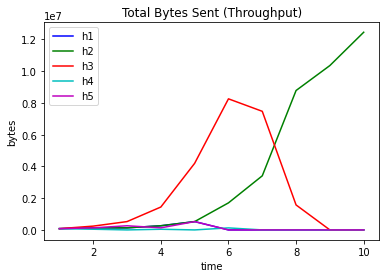

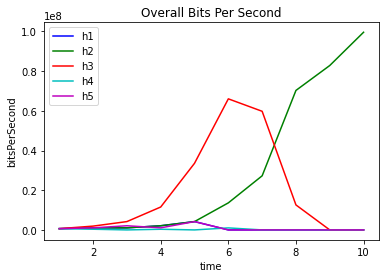

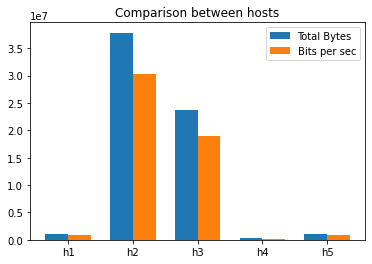

codel_tcp


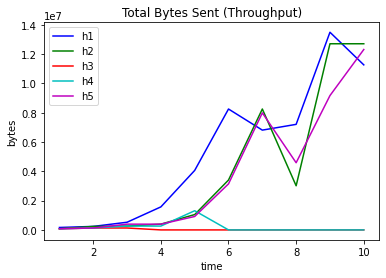

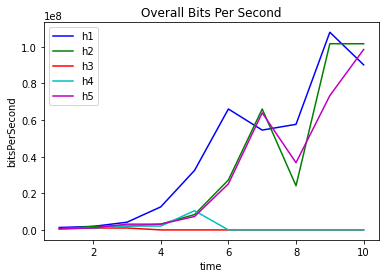

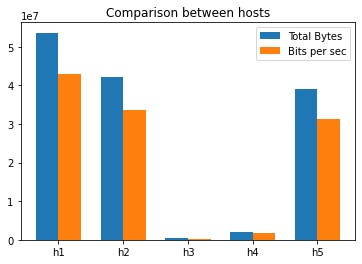

fq_codel_tcp


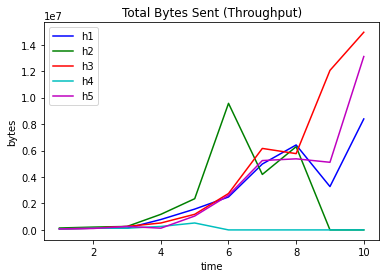

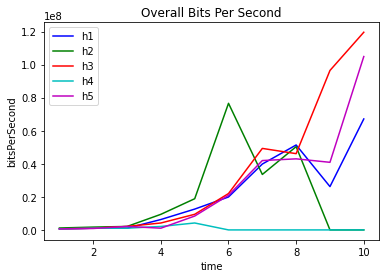

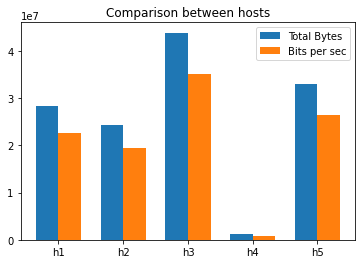

ets_strict_tcp


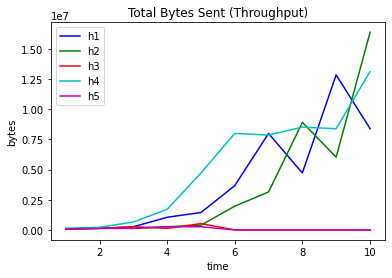

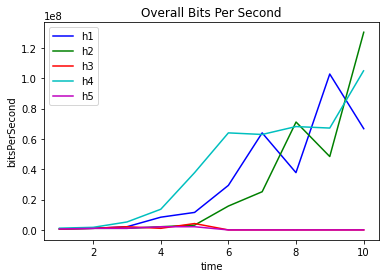

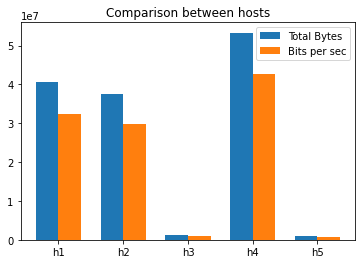

ets_tcp


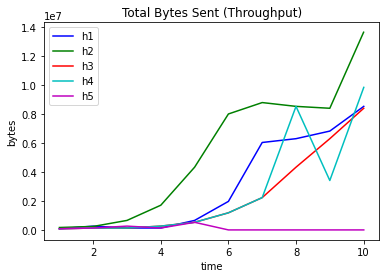

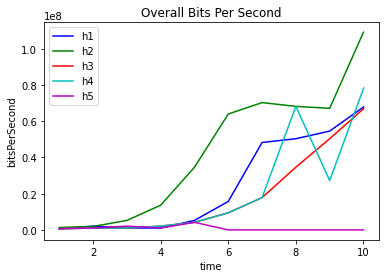

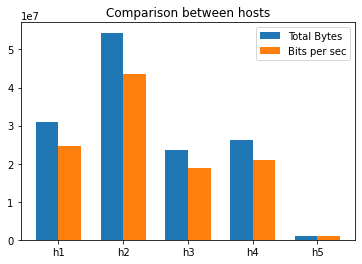

htb_tcp


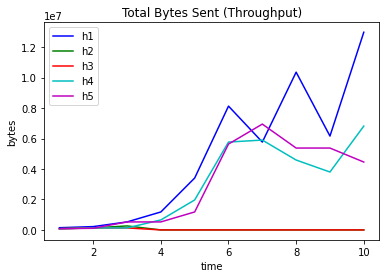

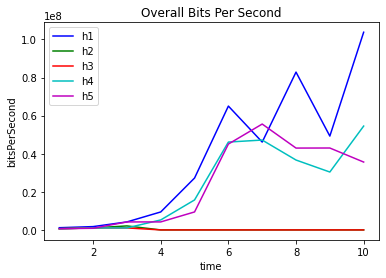

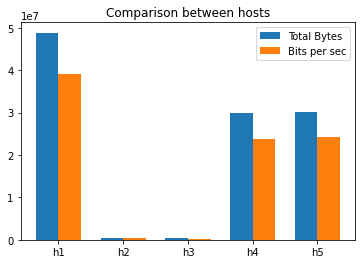

sfb_tcp


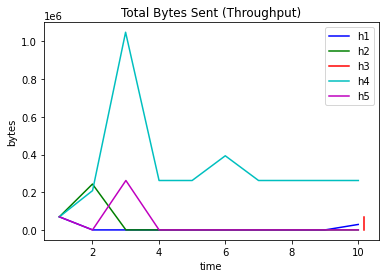

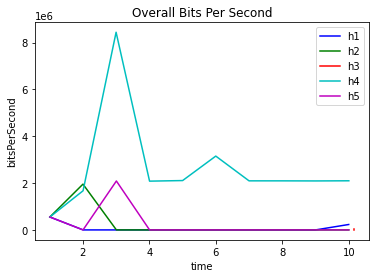

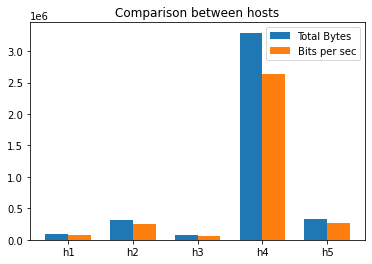

cbq_fq-codel_tcp


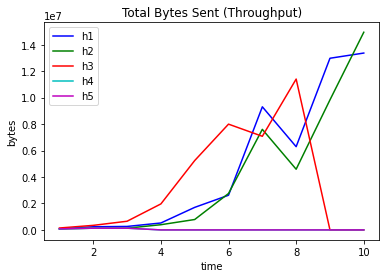

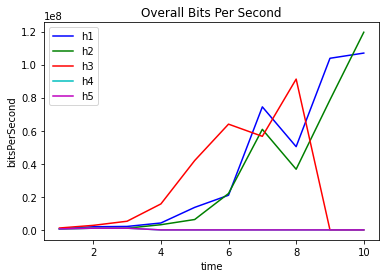

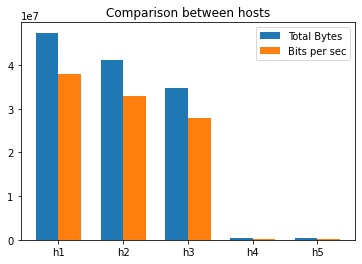

cbq_pfifo_tcp


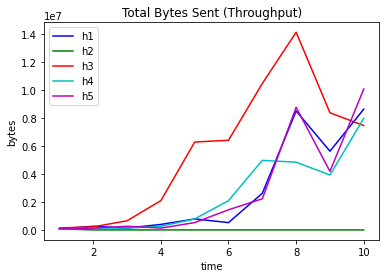

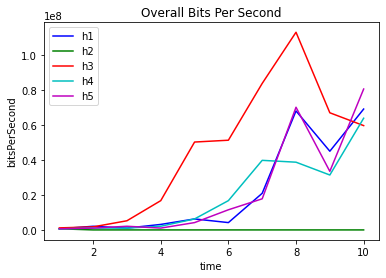

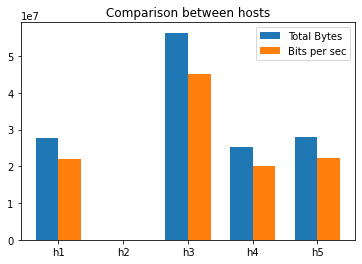

cbq_red_tcp


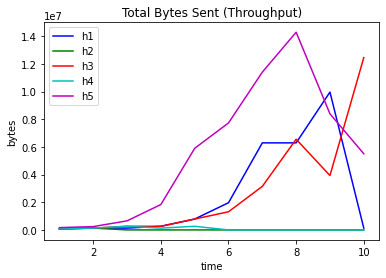

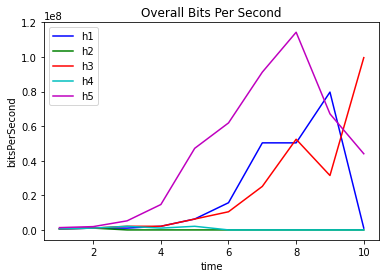

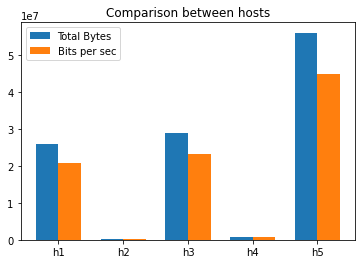

cake_tcp


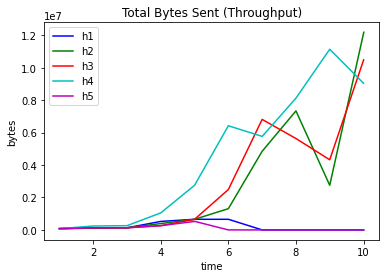

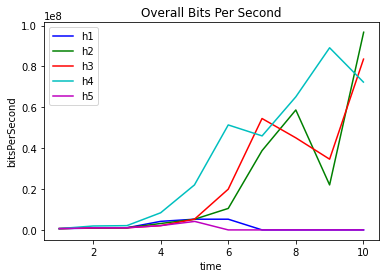

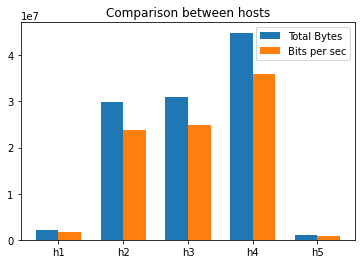

sfb_udp


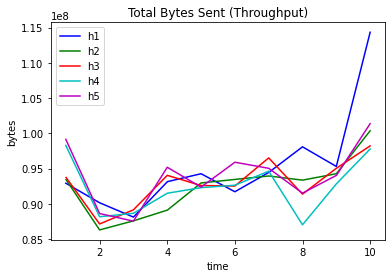

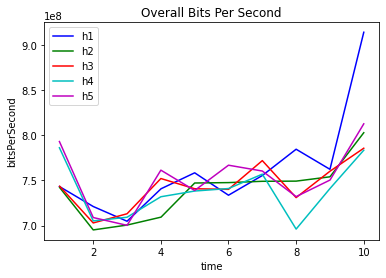

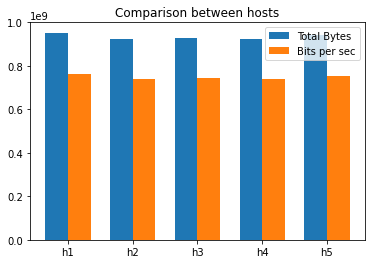

red_udp


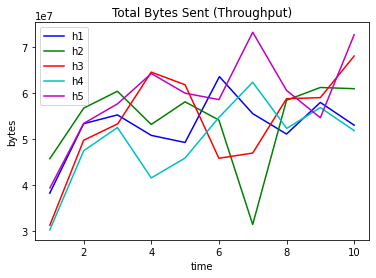

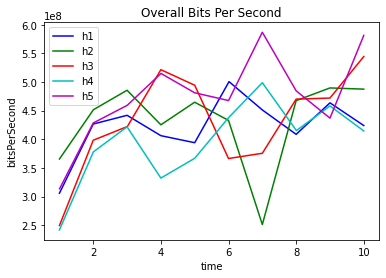

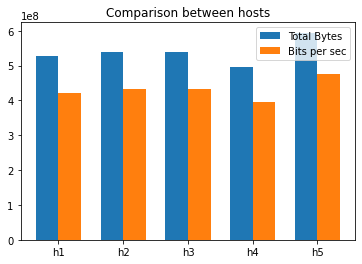

codel_udp


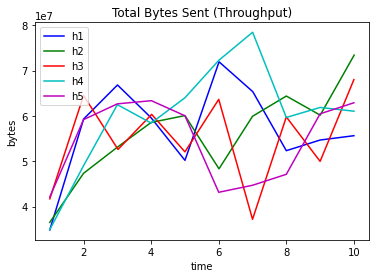

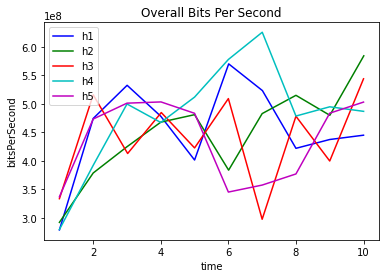

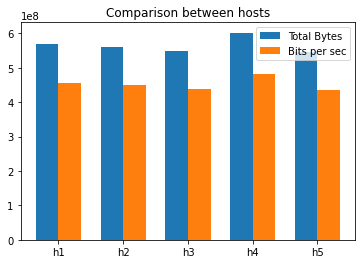

fq_codel_udp


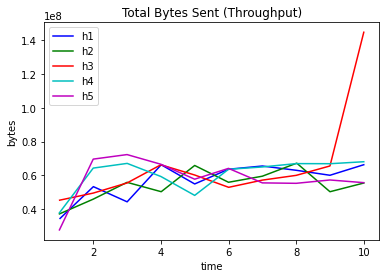

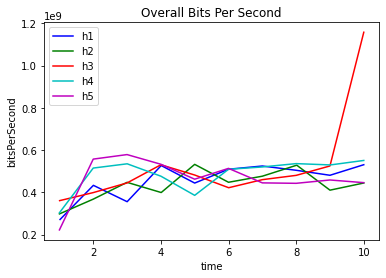

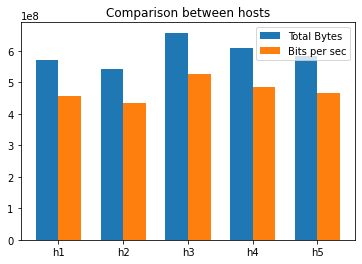

ets_strict_udp


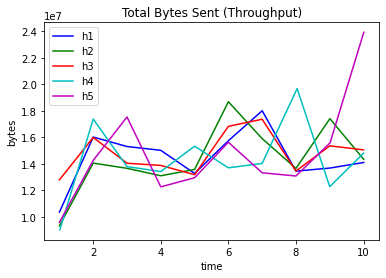

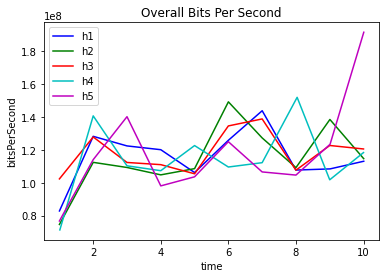

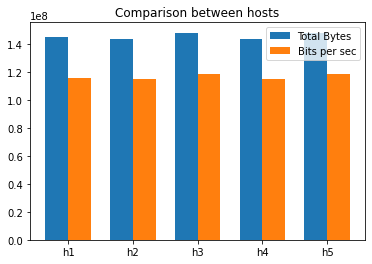

ets_udp


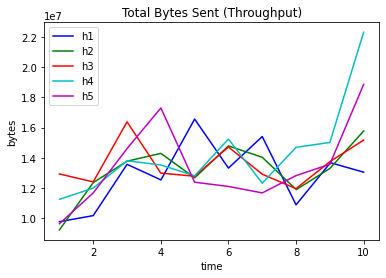

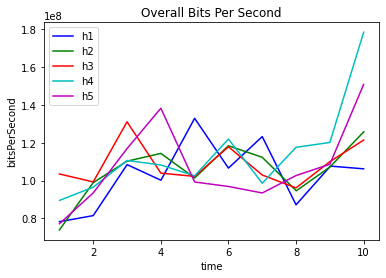

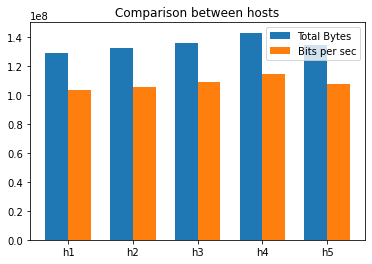

htb_udp


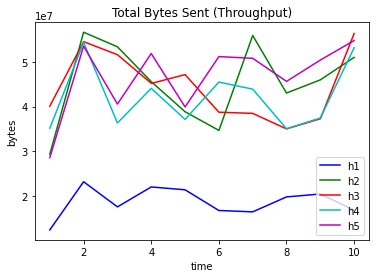

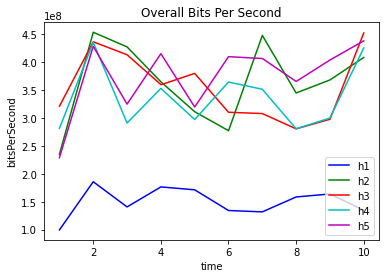

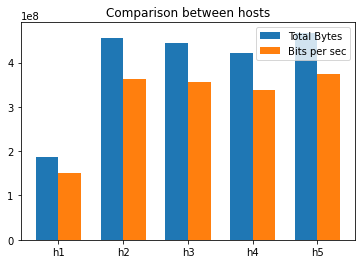

cbq_fq-codel_udp


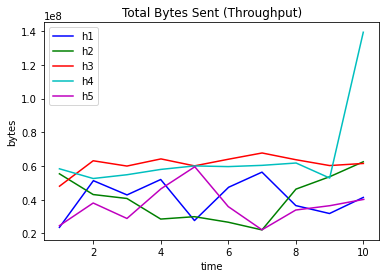

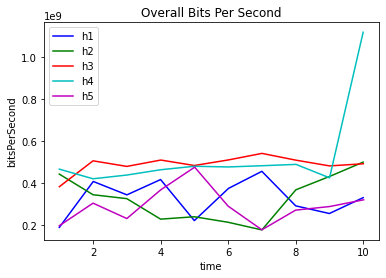

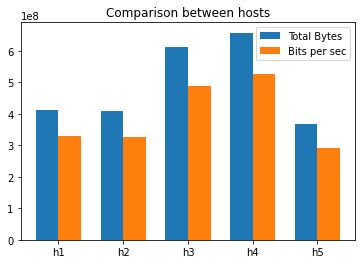

cbq_pfifo_udp


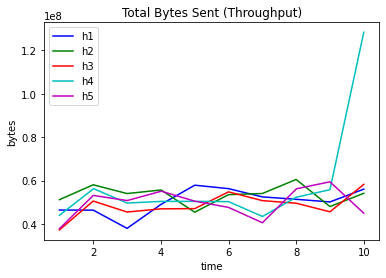

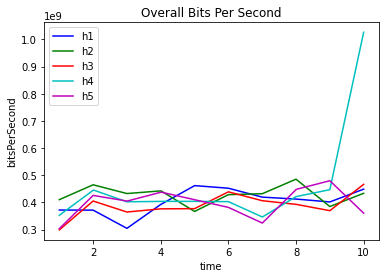

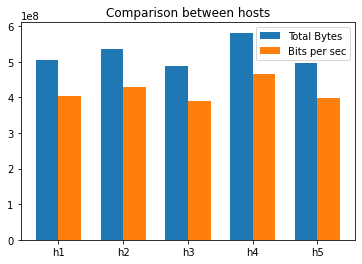

cbq_red_udp


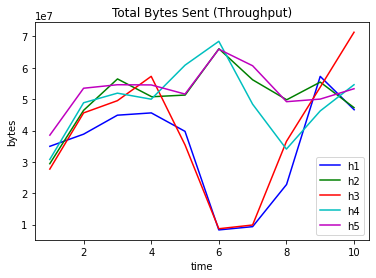

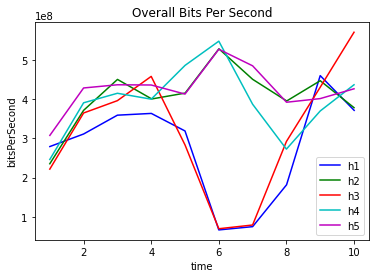

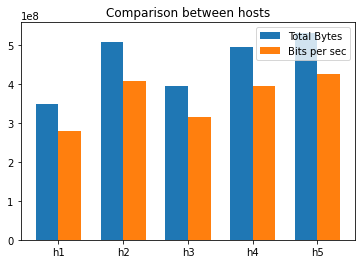

cake_udp


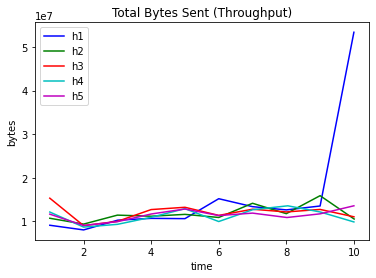

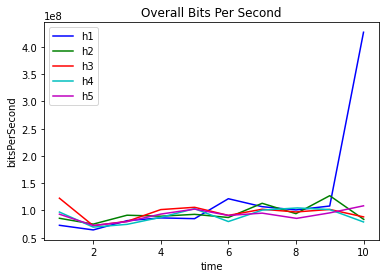

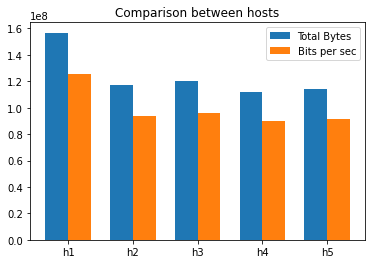

multi_red_r2_tcp


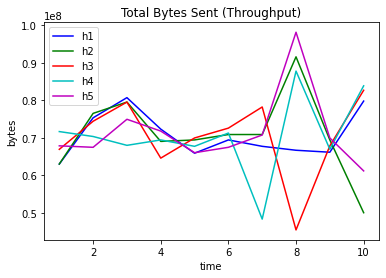

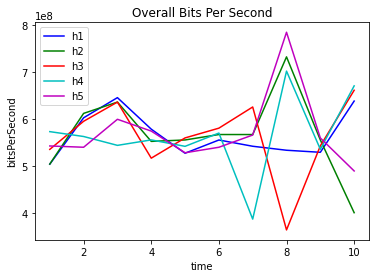

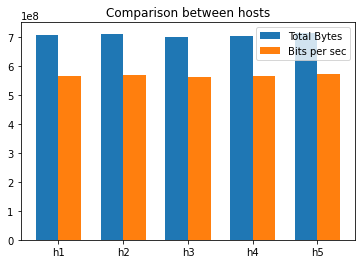

multi_red_r3_tcp


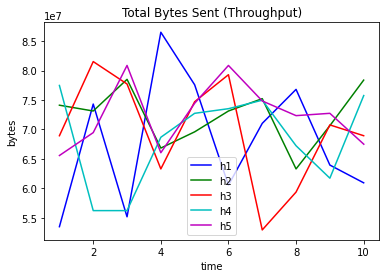

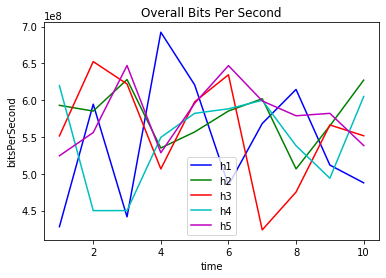

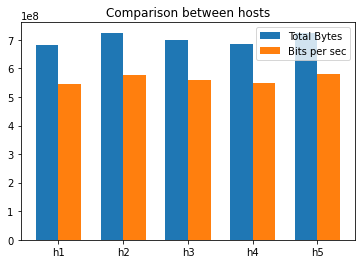

multi_redMix_r2_tcp


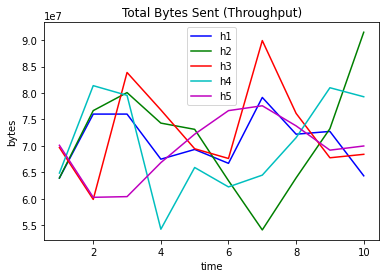

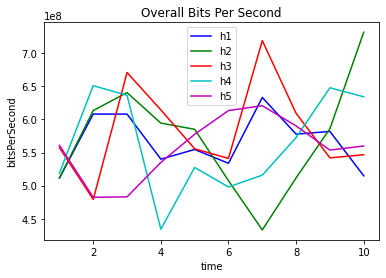

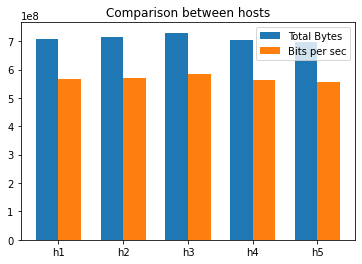

multi_redMix_r3_tcp


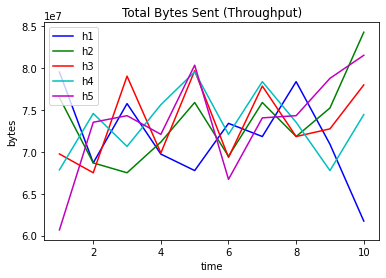

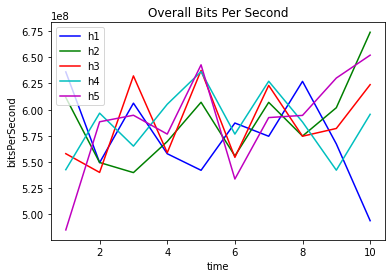

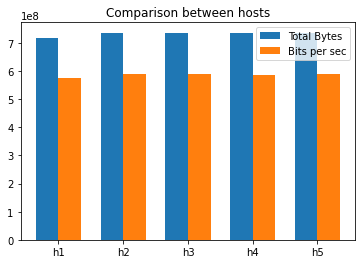

multi_fqCodel_r2_tcp


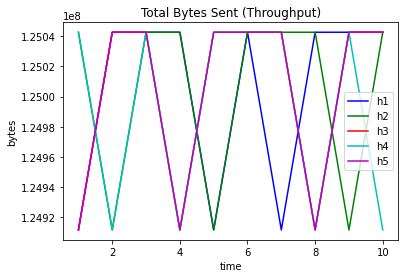

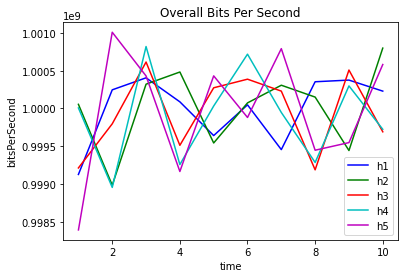

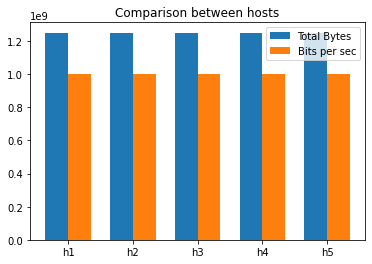

multi_fqCodel_r3_tcp


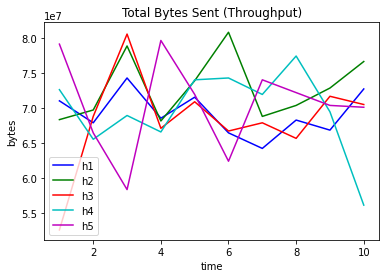

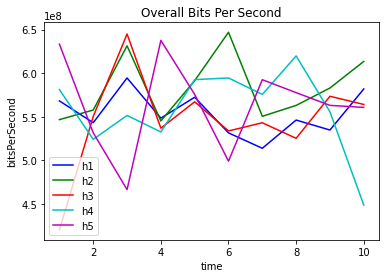

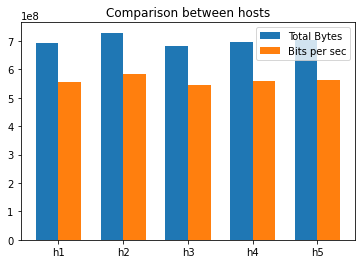

In [ ]:
##TODO: Label the lines according to the hosts, Make the value range more readable, Make the legend wording bigger
## DONE: added labels, legend wording is fine, value range is readable 
for j in result_list:
  print(j["name"])
  fig = plt.figure()
  ax1 = plt.axes()
  fig2 = plt.figure()
  ax2 = plt.axes()
  fig3 = plt.figure()
  ax3 = plt.axes()
  hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
  x = np.arange(len(hosts))
  width = 0.35
  rects1 = ax3.bar(x - width/2, totalBytes, width, label='Total Bytes')
  rects2 = ax3.bar(x + width/2, sumBps, width, label='Bits per sec')
  ax3.set_xticks(x)
  ax3.set_xticklabels(hosts)
  ax3.set_title("Comparison between hosts")
  ax3.legend()
  color_list = ['b','g','r','c','m']
  for i in range(len(intervals)):
    ax1.set_title("Total Bytes Sent (Throughput)")
    ax1.plot(intervals[i], bytesInterval[i],c=color_list[i],label = hosts[i])
    ax1.set_xlabel('time')
    ax1.set_ylabel('bytes')
    ax1.legend()
    ax2.set_title("Overall Bits Per Second")
    ax2.plot(intervals[i], bitsPerSecond[i],c=color_list[i],label = hosts[i])
    ax2.set_xlabel('time')
    ax2.set_ylabel('bitsPerSecond')
    ax2.legend()
  plt.show()

In [ ]:
def getRetransmit(result):
  host = []
  retransmit = []
  for i in result:
    if i == "name":
      continue
    host.append(i)
  host.sort()
  for i in host:
    retransmit.append(result[i]['retransmits'])
  return retransmit

In [ ]:
def getLost(result):
  host = []
  lostPackets = []
  lostPercent = []
  for i in result:
    if i == "name":
      continue
    host.append(i)
  host.sort()
  for i in host:
    lostPackets.append(result[i]['lostPackets'])
    lostPercent.append(result[i]['lostPercent'])
  return lostPackets, lostPercent

In [ ]:
def getThroughput(result):
  avgThroughputPerHost = 0
  overralThroughput = 0
  for i in result:
    if i == "name":
      continue
    overralThroughput += result[i]['totalBytesSent']
  avgThroughputPerHost = overralThroughput / (len(result)-1)
  return avgThroughputPerHost, overralThroughput

In [ ]:
##TODO: Make spaces betweeen the algorithms, Make empty spaces more obvious, Make the value range more readable, Make the legend wording bigger
def plotBarPerHost(list_of_algor, var):
  fig = plt.figure(figsize=(24,12))
  ax1 = plt.axes()
  x = np.arange(len(list_of_algor['algor_list']))
  width = 1
  rects1 = ax1.bar(x - 0.4, list_of_algor['h1'][var], 0.2, label='Health monitoring device')
  rects2 = ax1.bar(x - 0.2, list_of_algor['h2'][var], 0.2, label='Door alarm')
  rects3 = ax1.bar(x, list_of_algor['h3'][var], 0.2, label='Smartphone')
  rects4 = ax1.bar(x + 0.2, list_of_algor['h4'][var], 0.2, label='Smart Tv')
  rects5 = ax1.bar(x + 0.4, list_of_algor['h5'][var], 0.2, label='Smart coffee maker')
  ax1.set_title(var)
  ax1.set_xticks(x)
  ax1.set_xticklabels(list_of_algor['algor_list'])
  ax1.legend()
  plt.show()

In [ ]:
def plotSingleBarPerHost(list_of_algor, var, total):
  mode = 'Total'
  if not total:
    mode = 'Average'
  hosts_list = ['h1', 'h2', 'h3', 'h4', 'h5', ]
  fig = plt.figure(figsize=(24,12))
  ax1 = plt.axes()
  x = np.arange(len(list_of_algor['algor_list']))
  width = 1
  value_list = [0 for j in range(len(list_of_algor['algor_list']))]
  for i in hosts_list:
    value_list = np.add(value_list, list_of_algor[i][var])
  if mode == 'Average':
    temp_list = []
    for i in value_list:
      temp_list.append(i/len(hosts_list))
    value_list = temp_list
  rects1 = ax1.bar(x, value_list, 0.2, label=f'{mode}')
  ax1.set_title(f'{mode} {var}')
  ax1.set_xticks(x)
  ax1.set_xticklabels(list_of_algor['algor_list'])
  ax1.legend()
  plt.show()

In [ ]:
# Split into list of algo # of graphs
def plotBarPerHost_2(algor,all_data,var,idx):
  host_list = ['h1','h2','h3','h4','h5']
  color_list = ['b','g','r','c','m']
  label_list = ['Health Monitoring Device', 'Door Alarm','Smartphone','Smart TV','Smart Coffee Maker']
  width = 0.25
  bar_list = []
  ind = np.arange(len(hosts_list))
  count = 0
  max_data = 0
  max_idx = 0
  for i in range(len(host_list)):
    data = [all_data[host_list[i]][var][idx]]
    if data[0] > max_data:
      max_data = data[0]
      max_idx = i
    bar_list.append(plt.bar(np.ones(1) + (width*count),data,width,color=color_list[i]))
    count += 1
  
  plt.ylabel(var)
  plt.title(f"{var} for {algor} per host")
  plt.legend( bar_list , label_list)
  plt.show()
  print(f"Highest {var} is host {host_list[max_idx]} with value: {max_data}\n\n")


In [ ]:
##TODO: Make spaces betweeen the algorithms, Make empty spaces more obvious, Make the value range more readable, Make the legend wording bigger
def plotBarPerAlgor(list_of_algor, var):
  fig = plt.figure(figsize=(24,12))
  ax1 = plt.axes()
  x = np.arange(len(list_of_algor['algor_list']))
  width = 1
  rects1 = ax1.bar(x, list_of_algor[var], 0.2, label=f'{var}')
  ax1.set_title(var)
  ax1.set_xticks(x)
  ax1.set_xticklabels(list_of_algor['algor_list'])
  ax1.legend()
  plt.show()

In [ ]:
variables = ['totalBytes']
hosts_list = ['h1', 'h2', 'h3', 'h4', 'h5'] ##sorted
list_of_algor_tcp = {'algor_list': [], 'avgThroughputPerHost': [], 'totalThroughput': []}
list_of_algor_udp = {'algor_list': [], 'avgThroughputPerHost': [], 'totalThroughput': []}
for i in hosts_list:
  list_of_algor_tcp[f'{i}'] = {}
  list_of_algor_udp[f'{i}'] = {}
  list_of_algor_tcp[f'{i}']['totalBytes'] = []
  list_of_algor_tcp[f'{i}']['retransmit'] = []
  list_of_algor_udp[f'{i}']['totalBytes'] = []
  list_of_algor_udp[f'{i}']['lostPackets'] = []
  list_of_algor_udp[f'{i}']['lostPercent'] = []
for j in result_list:
  if len(j.keys()) < 2:
    continue
  if j["name"].endswith("tcp"):
    list_of_algor_tcp['algor_list'].append(j["name"])
    hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
    avgThroughputPerHost, totalThroughput = getThroughput(j)
    list_of_algor_tcp['avgThroughputPerHost'].append(avgThroughputPerHost)
    list_of_algor_tcp['totalThroughput'].append(totalThroughput)
    for i in range(len(hosts_list)):
      list_of_algor_tcp[hosts[i]]['totalBytes'].append(totalBytes[i])
      list_of_algor_tcp[hosts[i]]['retransmit'].append(getRetransmit(j)[i])
  if j["name"].endswith("udp"):
    list_of_algor_udp['algor_list'].append(j["name"])
    hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
    avgThroughputPerHost, overallThroughput = getThroughput(j)
    lostPackets,lostPercent= getLost(j)
    list_of_algor_udp['avgThroughputPerHost'].append(avgThroughputPerHost)
    list_of_algor_udp['totalThroughput'].append(totalThroughput)
    for i in range(len(hosts_list)):
      list_of_algor_udp[hosts[i]]['totalBytes'].append(totalBytes[i])
      list_of_algor_udp[hosts[i]]['lostPackets'].append(lostPackets[i])
      list_of_algor_udp[hosts[i]]['lostPercent'].append(lostPercent[i])

In [ ]:
#Old Maniplulation
# list_of_algor = {}
# for j in result_list:
#   if j["name"].endswith("tcp"):
#     list_of_algor[j["name"]] = {}
#     hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
#     avgThroughputPerHost, overallThroughput = getThroughput(j)
#     list_of_algor[j["name"]]['hosts'] = hosts
#     list_of_algor[j["name"]]['sumBps'] = sumBps
#     list_of_algor[j["name"]]['totalBytes'] = totalBytes
#     list_of_algor[j["name"]]['retransmit'] = getRetransmit(j)
#     list_of_algor[j["name"]]['avgThroughputPerHost'] = avgThroughputPerHost
#     list_of_algor[j["name"]]['overallThroughput'] = overallThroughput
#   if j["name"].endswith("udp"):
#     list_of_algor[j["name"]] = {}
#     hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
#     avgThroughputPerHost, overallThroughput = getThroughput(j)
#     list_of_algor[j["name"]]['hosts'] = hosts
#     list_of_algor[j["name"]]['sumBps'] = sumBps
#     list_of_algor[j["name"]]['totalBytes'] = totalBytes
#     list_of_algor[j["name"]]['overallThroughput'] = overallThroughput
#     list_of_algor[j["name"]]['lostPackets'], list_of_algor[j["name"]]['lostPercent']= getLost(j)

In [ ]:
print(list_of_algor_tcp)

{'algor_list': ['red_tcp', 'codel_tcp', 'fq_codel_tcp', 'ets_strict_tcp', 'ets_tcp', 'htb_tcp', 'sfb_tcp', 'cbq_fq-codel_tcp', 'cbq_pfifo_tcp', 'cbq_red_tcp', 'cake_tcp', 'multi_red_r2_tcp', 'multi_red_r3_tcp', 'multi_redMix_r2_tcp', 'multi_redMix_r3_tcp', 'multi_fqCodel_r2_tcp', 'multi_fqCodel_r3_tcp'], 'avgThroughputPerHost': [12831249.6, 27455409.6, 26109068.8, 26663764.8, 27250038.4, 21941697.6, 821011.2, 24824412.8, 27424851.2, 22426588.8, 21801937.6, 708438688.0, 702051940.8, 710786875.2, 732112676.8, 1250007449.6, 700988780.8], 'totalThroughput': [64156248, 137277048, 130545344, 133318824, 136250192, 109708488, 4105056, 124122064, 137124256, 112132944, 109009688, 3542193440, 3510259704, 3553934376, 3660563384, 6250037248, 3504943904], 'h1': {'totalBytes': [1127464, 53621424, 28260120, 40580136, 30880808, 48859392, 98464, 47374160, 27603256, 26031144, 2154320, 707384208, 680420824, 708027456, 717717648, 1250033664, 691929088], 'retransmit': [1, 0, 1, 0, 1, 0, 3, 0, 0, 65, 1, 9845

In [ ]:
print(list_of_algor_udp)

{'algor_list': ['sfb_udp', 'red_udp', 'codel_udp', 'fq_codel_udp', 'ets_strict_udp', 'ets_udp', 'htb_udp', 'cbq_fq-codel_udp', 'cbq_pfifo_udp', 'cbq_red_udp', 'cake_udp'], 'avgThroughputPerHost': [934395904.0, 539363782.4, 566048105.6, 592579809.6, 145629124.8, 134979664.0, 395092592.0, 491598316.8, 520902651.2, 455952900.8, 124219576.0], 'totalThroughput': [109009688, 109009688, 109009688, 109009688, 109009688, 109009688, 109009688, 109009688, 109009688, 109009688, 109009688], 'h1': {'totalBytes': [952451072, 527891568, 570697344, 572110592, 144960728, 128997976, 187056984, 411168288, 504487544, 348458304, 156747448], 'lostPackets': [1008, 16562, 12696, 12869, 12990, 7430, 757, 11696, 9275, 5651, 7878], 'lostPercent': [0.866977, 4.542935984156504, 3.2212885154061626, 3.257117113468859, 12.97559708723317, 8.340161864245063, 0.5859904166956953, 4.118948006029103, 2.662146996438033, 2.348243077025365, 7.277530923501861]}, 'h2': {'totalBytes': [924745728, 540106896, 561813864, 543806536, 

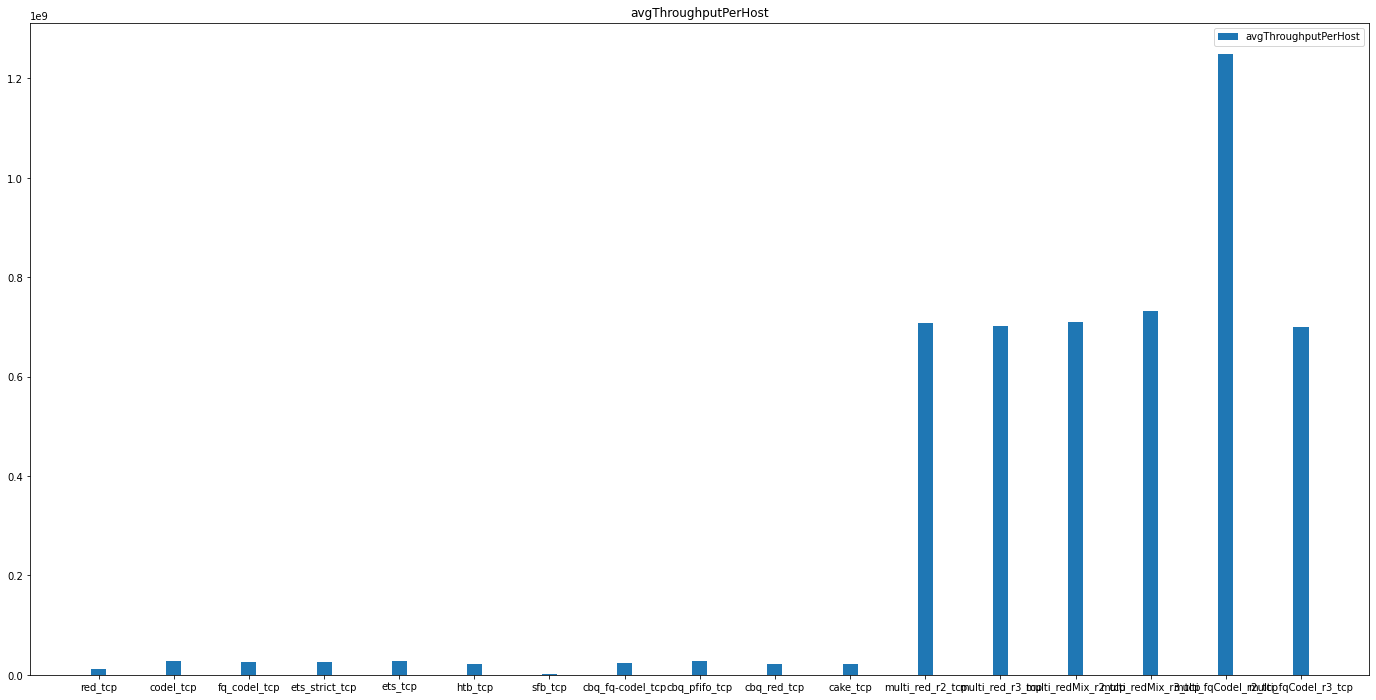

In [ ]:
plotBarPerAlgor(list_of_algor_tcp, 'avgThroughputPerHost')

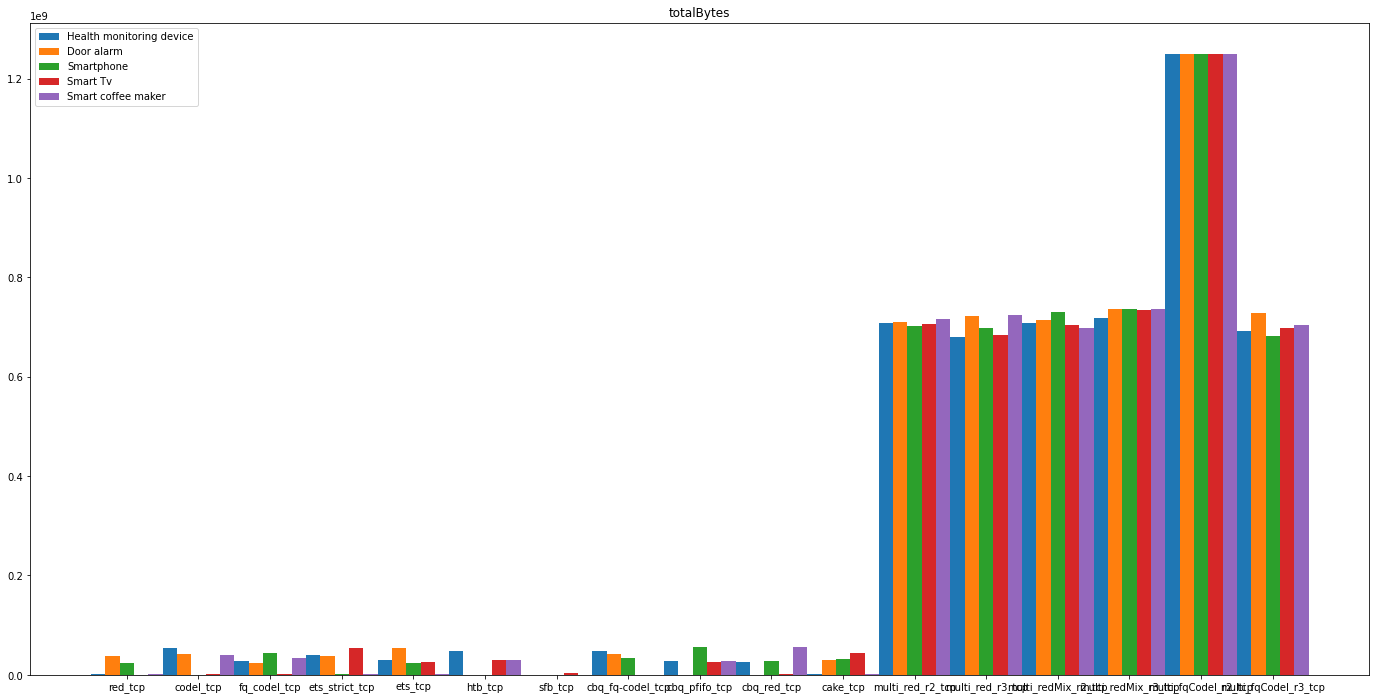

In [ ]:
# Plotting graphs for ALL algorithms in totalBytes
# for i in range(len(list_of_algor_tcp['algor_list'])):
#   plotBarPerHost_2(list_of_algor_tcp['algor_list'][i],list_of_algor_tcp, 'totalBytes',i)

plotBarPerHost(list_of_algor_tcp,'totalBytes')

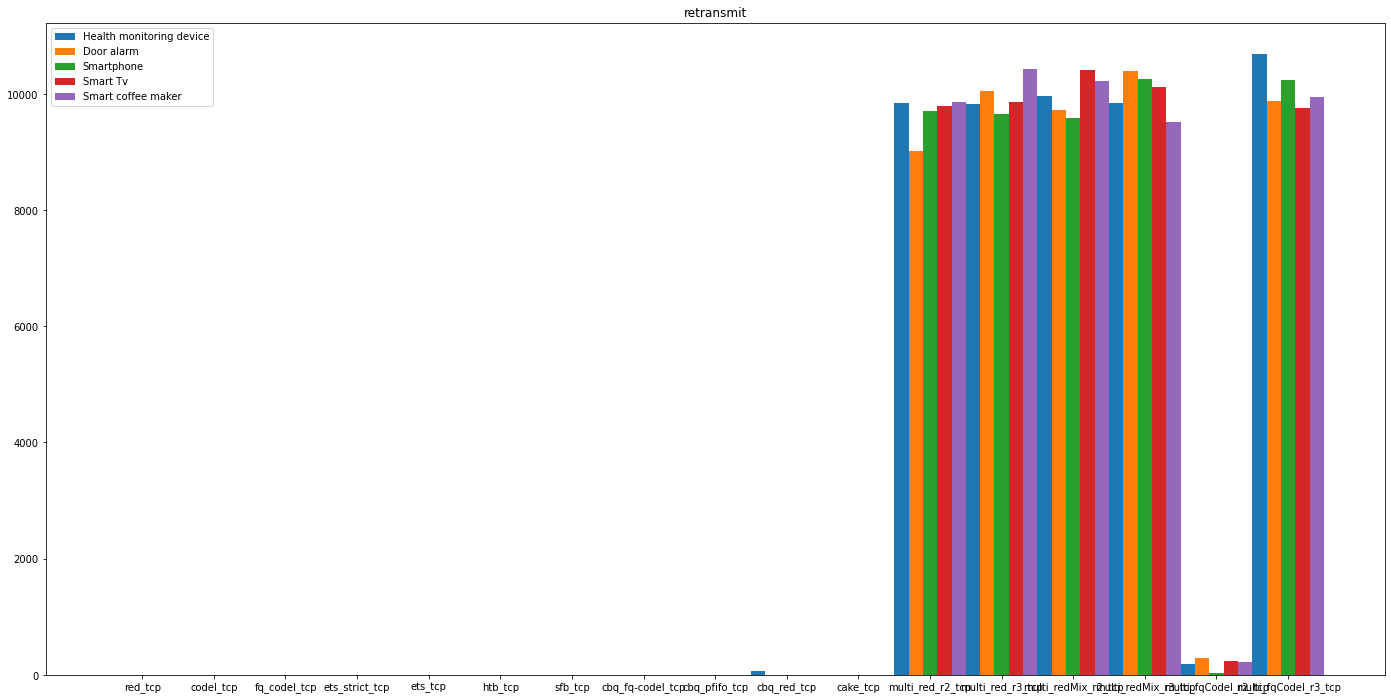

In [ ]:
# Plotting graphs for ALL algorithms in retransmit
# for i in range(len(list_of_algor_tcp['algor_list'])):
#   plotBarPerHost_2(list_of_algor_tcp['algor_list'][i],list_of_algor_tcp, 'retransmit',i)

plotBarPerHost(list_of_algor_tcp,'retransmit')

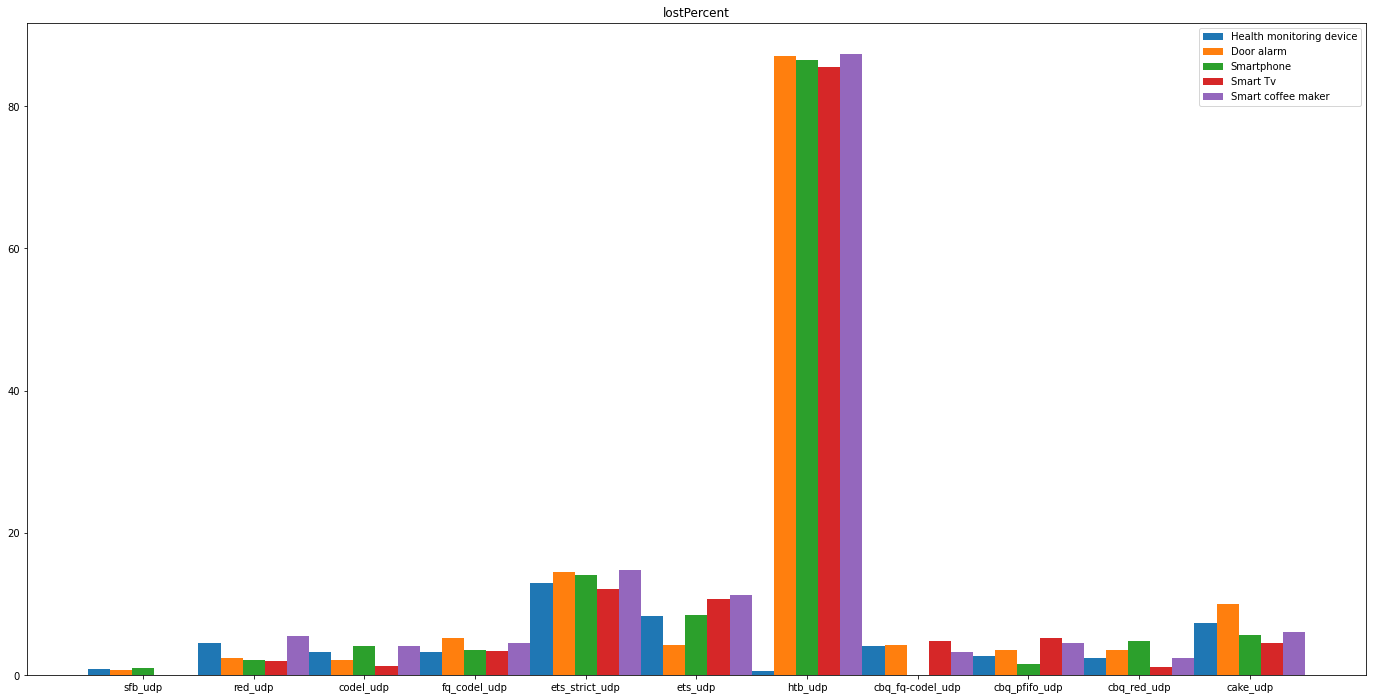

In [ ]:
# Plotting graphs for ALL algorithms in lostPercent
# for i in range(len(list_of_algor_udp['algor_list'])):
#   plotBarPerHost_2(list_of_algor_udp['algor_list'][i],list_of_algor_udp, 'lostPercent',i)

plotBarPerHost(list_of_algor_udp,'lostPercent')

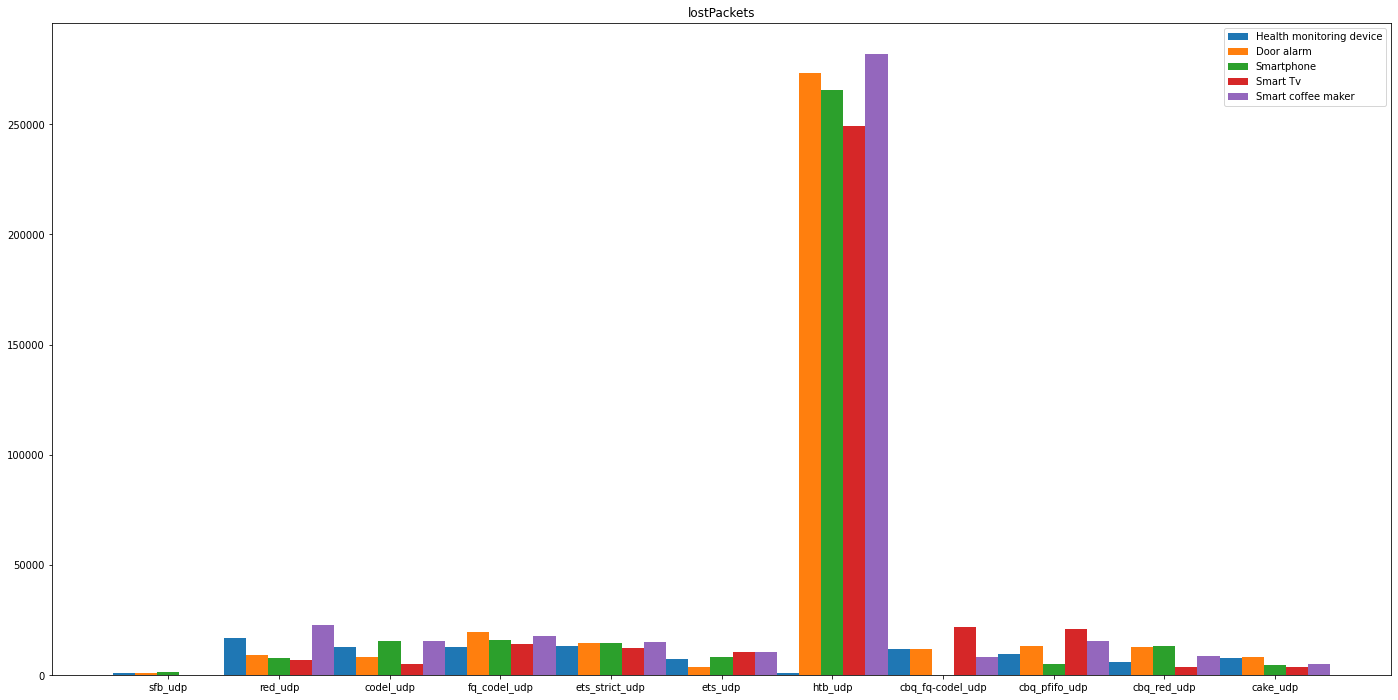

In [ ]:
# Plotting graphs for ALL algorithms in lostPackets
# for i in range(len(list_of_algor_udp['algor_list'])):
#   plotBarPerHost_2(list_of_algor_udp['algor_list'][i],list_of_algor_udp, 'lostPackets',i)

plotBarPerHost(list_of_algor_udp,'lostPackets')

In [ ]:
classful_algor_list = [ets_strict_udp_result,
                       ets_udp_result,
                       ets_strict_tcp_result,
                       ets_tcp_result,
                       htb_tcp_result,
                       htb_udp_result]

In [ ]:
classless_algor_list = [red_tcp_result,
                        codel_tcp_result,
                        fq_codel_tcp_result,
                        sfb_tcp_result,
                        red_udp_result,
                        codel_udp_result,
                        fq_codel_udp_result,
                        sfb_udp_result
                        ]

In [ ]:
ets_list = [ets_strict_udp_result,
            ets_udp_result,
            ets_strict_tcp_result,
            ets_tcp_result]

In [ ]:
list_of_ets_algor = {'algor_list': [], 'avgThroughputNonPirotized': [], 'throughtputPirotized': []}
for i in result_list:
  if i in ets_list:
    nonPriotizedTotalBytes = 0
    hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(i)
    for z in range(1, len(totalBytes)):
      nonPriotizedTotalBytes += totalBytes[z]
    avgThroughputNonPirotized = nonPriotizedTotalBytes / (len(hosts)-1)
    list_of_ets_algor['algor_list'].append(i["name"])
    list_of_ets_algor['avgThroughputNonPirotized'].append(avgThroughputNonPirotized)
    list_of_ets_algor['throughtputPirotized'].append(totalBytes[0])

In [ ]:
list_of_classful_algor = {'algor_list': [], 'avgThroughputNonPirotized': [], 'throughtputPirotized': []}
for i in result_list:
  if i in classful_algor_list:
    nonPriotizedTotalBytes = 0
    hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(i)
    for z in range(1, len(totalBytes)):
      nonPriotizedTotalBytes += totalBytes[z]
    avgThroughputNonPirotized = nonPriotizedTotalBytes / (len(hosts)-1)
    list_of_classful_algor['algor_list'].append(i["name"])
    list_of_classful_algor['avgThroughputNonPirotized'].append(avgThroughputNonPirotized)
    list_of_classful_algor['throughtputPirotized'].append(totalBytes[0])

In [ ]:
def plotBarPerPirotize(list_of_algor):
  fig = plt.figure(figsize=(24,12))
  ax1 = plt.axes()
  x = np.arange(len(list_of_algor['algor_list']))
  width = 1
  rects1 = ax1.bar(x - 0.1, list_of_algor["throughtputPirotized"], 0.2, label='Priotized')
  rects2 = ax1.bar(x + 0.1, list_of_algor['avgThroughputNonPirotized'], 0.2, label='Non-Priotized Average')
  ax1.set_title("Compare Classful Throughtput")
  ax1.set_xticks(x)
  ax1.set_xticklabels(list_of_algor['algor_list'])
  ax1.legend()
  plt.show()

In [ ]:
def plotBarPerPirotize(list_of_algor):
  fig = plt.figure(figsize=(24,12))
  ax1 = plt.axes()
  x = np.arange(len(list_of_algor['algor_list']))
  width = 1
  rects1 = ax1.bar(x - 0.1, list_of_algor["throughtputPirotized"], 0.2, label='Priotized')
  rects2 = ax1.bar(x + 0.1, list_of_algor['avgThroughputNonPirotized'], 0.2, label='Non-Priotized Average')
  ax1.set_title("Compare Classful Throughtput")
  ax1.set_xticks(x)
  ax1.set_xticklabels(list_of_algor['algor_list'])
  ax1.legend()
  plt.show()

In [ ]:
def plot2Bar(list_of_algor, var1, var2):
  fig = plt.figure(figsize=(24,12))
  ax1 = plt.axes()
  x = np.arange(len(list_of_algor['algor_list']))
  width = 1
  rects1 = ax1.bar(x - 0.1, list_of_algor[f"{var1}"], 0.2, label=f"{var1}")
  rects2 = ax1.bar(x + 0.1, list_of_algor[f"{var2}"], 0.2, label=f"{var2}")
  ax1.set_title(f"{var1} vs {var2}")
  ax1.set_xticks(x)
  ax1.set_xticklabels(list_of_algor['algor_list'], fontsize=18)
  ax1.legend(fontsize=14)
  plt.show()

In [ ]:
print(list_of_classful_algor)


{'algor_list': ['ets_strict_tcp', 'ets_tcp', 'htb_tcp', 'ets_strict_udp', 'ets_udp', 'htb_udp'], 'avgThroughputNonPirotized': [23184672.0, 26342346.0, 15212274.0, 145796224.0, 136475086.0, 447101494.0], 'throughtputPirotized': [40580136, 30880808, 48859392, 144960728, 128997976, 187056984]}


{'algor_list': ['ets_strict_tcp', 'ets_tcp', 'htb_tcp', 'ets_strict_udp', 'ets_udp', 'htb_udp'], 'avgThroughputNonPirotized': [23184672.0, 26342346.0, 15212274.0, 145796224.0, 136475086.0, 447101494.0], 'throughtputPirotized': [40580136, 30880808, 48859392, 144960728, 128997976, 187056984]}


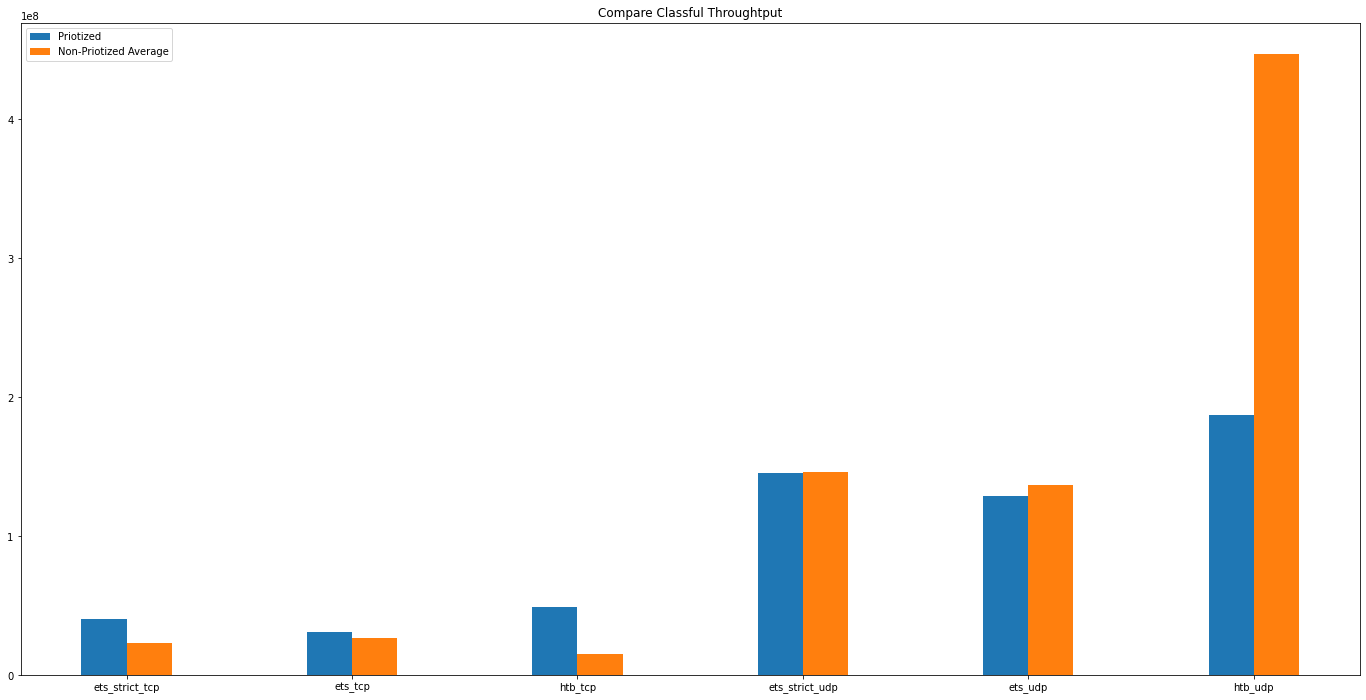

In [ ]:
print(list_of_classful_algor)
plotBarPerPirotize(list_of_classful_algor)

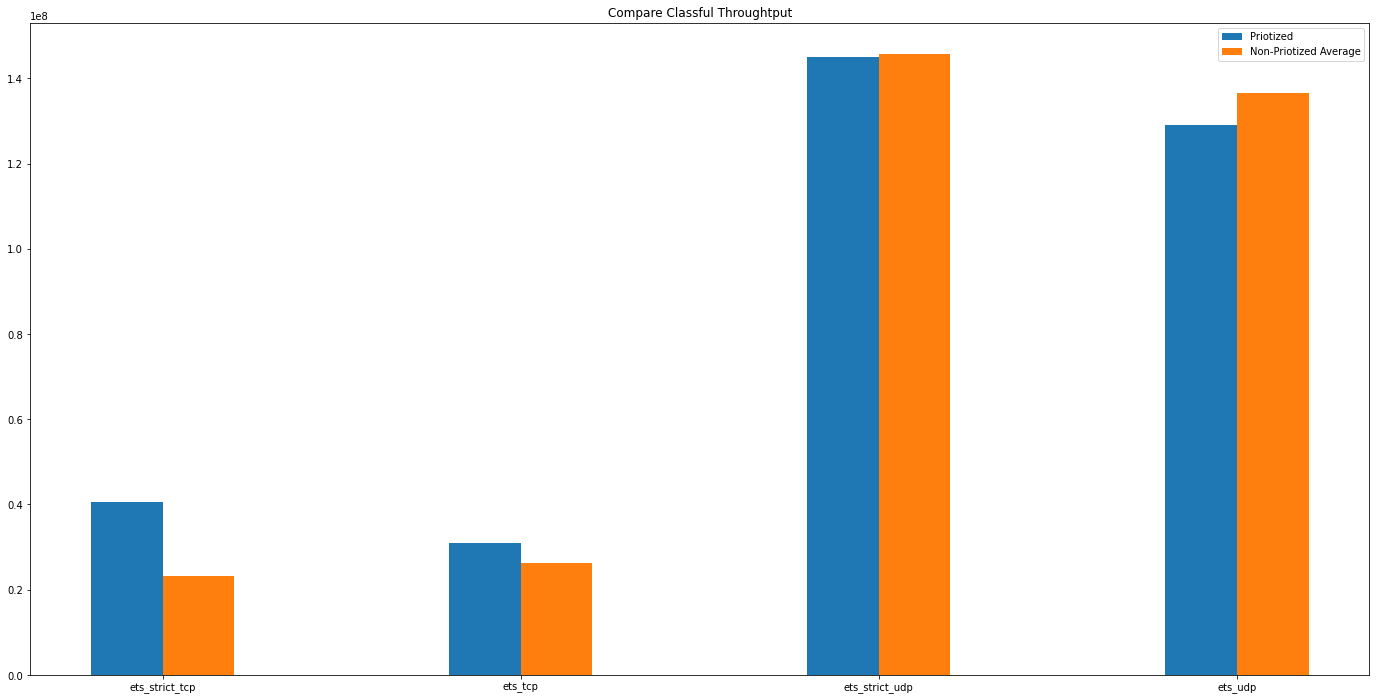

In [ ]:
# plotBarPerPirotize(list_of_ets_algor)

In [ ]:
import copy
list_of_multi_algor = copy.deepcopy(list_of_algor_tcp)
multi_pos = []
for i in list_of_algor_tcp['algor_list']:
  if i.startswith('multi'):
    multi_pos.append(list_of_algor_tcp['algor_list'].index(i))
for keys, values in list_of_multi_algor.items():
  if isinstance(values, list):
    temp_list = []
    for i in range(len(values)):
      if i in multi_pos:
        temp_list.append(values[i])
    list_of_multi_algor[keys] = temp_list
    print(list_of_multi_algor[keys])
  else:
    for subKeys, subValues in values.items():
      print(subKeys, subValues)
      temp_list = []
      for i in range(len(subValues)):
        if i in multi_pos:
          temp_list.append(subValues[i])
      values[subKeys] = temp_list

['multi_red_r2_tcp', 'multi_red_r3_tcp', 'multi_redMix_r2_tcp', 'multi_redMix_r3_tcp', 'multi_fqCodel_r2_tcp', 'multi_fqCodel_r3_tcp']
[708438688.0, 702051940.8, 710786875.2, 732112676.8, 1250007449.6, 700988780.8]
[3542193440, 3510259704, 3553934376, 3660563384, 6250037248, 3504943904]
totalBytes [1127464, 53621424, 28260120, 40580136, 30880808, 48859392, 98464, 47374160, 27603256, 26031144, 2154320, 707384208, 680420824, 708027456, 717717648, 1250033664, 691929088]
retransmit [1, 0, 1, 0, 1, 0, 3, 0, 0, 65, 1, 9845, 9818, 9958, 9849, 184, 10693]
totalBytes [37827624, 42131280, 24213512, 37434408, 54407856, 472104, 312768, 41235496, 79640, 209960, 29832232, 710672384, 722929376, 714449688, 736417776, 1250033664, 728690496]
retransmit [1, 0, 1, 1, 0, 2, 2, 2, 4, 2, 1, 9013, 10055, 9722, 10387, 290, 9880]
totalBytes [23781200, 341032, 43856936, 1127464, 23540776, 341032, 69504, 34830344, 56330496, 28914728, 31011880, 702529936, 697565184, 729643672, 735595096, 1250033664, 682479088]
ret

In [ ]:
print(list_of_algor_tcp)

{'algor_list': ['red_tcp', 'codel_tcp', 'fq_codel_tcp', 'ets_strict_tcp', 'ets_tcp', 'htb_tcp', 'sfb_tcp', 'cbq_fq-codel_tcp', 'cbq_pfifo_tcp', 'cbq_red_tcp', 'cake_tcp', 'multi_red_r2_tcp', 'multi_red_r3_tcp', 'multi_redMix_r2_tcp', 'multi_redMix_r3_tcp', 'multi_fqCodel_r2_tcp', 'multi_fqCodel_r3_tcp'], 'avgThroughputPerHost': [12831249.6, 27455409.6, 26109068.8, 26663764.8, 27250038.4, 21941697.6, 821011.2, 24824412.8, 27424851.2, 22426588.8, 21801937.6, 708438688.0, 702051940.8, 710786875.2, 732112676.8, 1250007449.6, 700988780.8], 'totalThroughput': [64156248, 137277048, 130545344, 133318824, 136250192, 109708488, 4105056, 124122064, 137124256, 112132944, 109009688, 3542193440, 3510259704, 3553934376, 3660563384, 6250037248, 3504943904], 'h1': {'totalBytes': [1127464, 53621424, 28260120, 40580136, 30880808, 48859392, 98464, 47374160, 27603256, 26031144, 2154320, 707384208, 680420824, 708027456, 717717648, 1250033664, 691929088], 'retransmit': [1, 0, 1, 0, 1, 0, 3, 0, 0, 65, 1, 9845

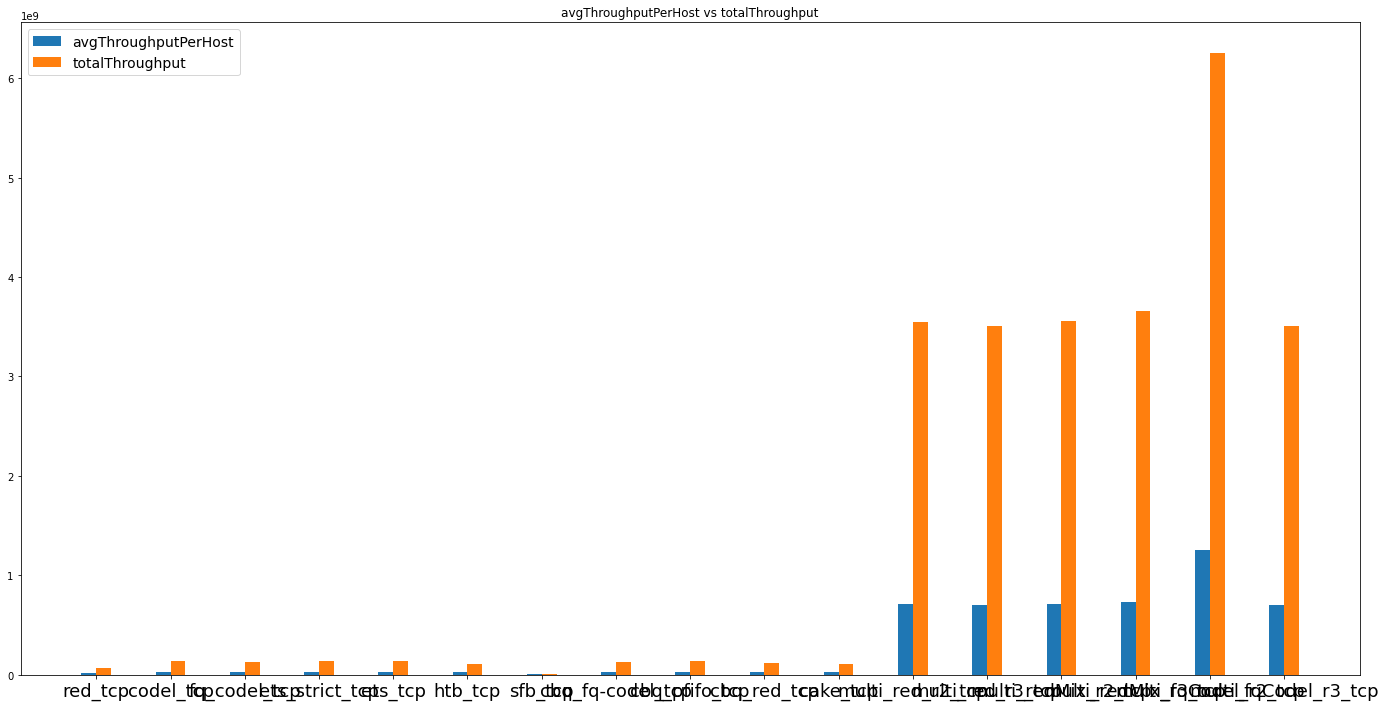

In [ ]:
plot2Bar(list_of_algor_tcp, 'avgThroughputPerHost', 'totalThroughput')

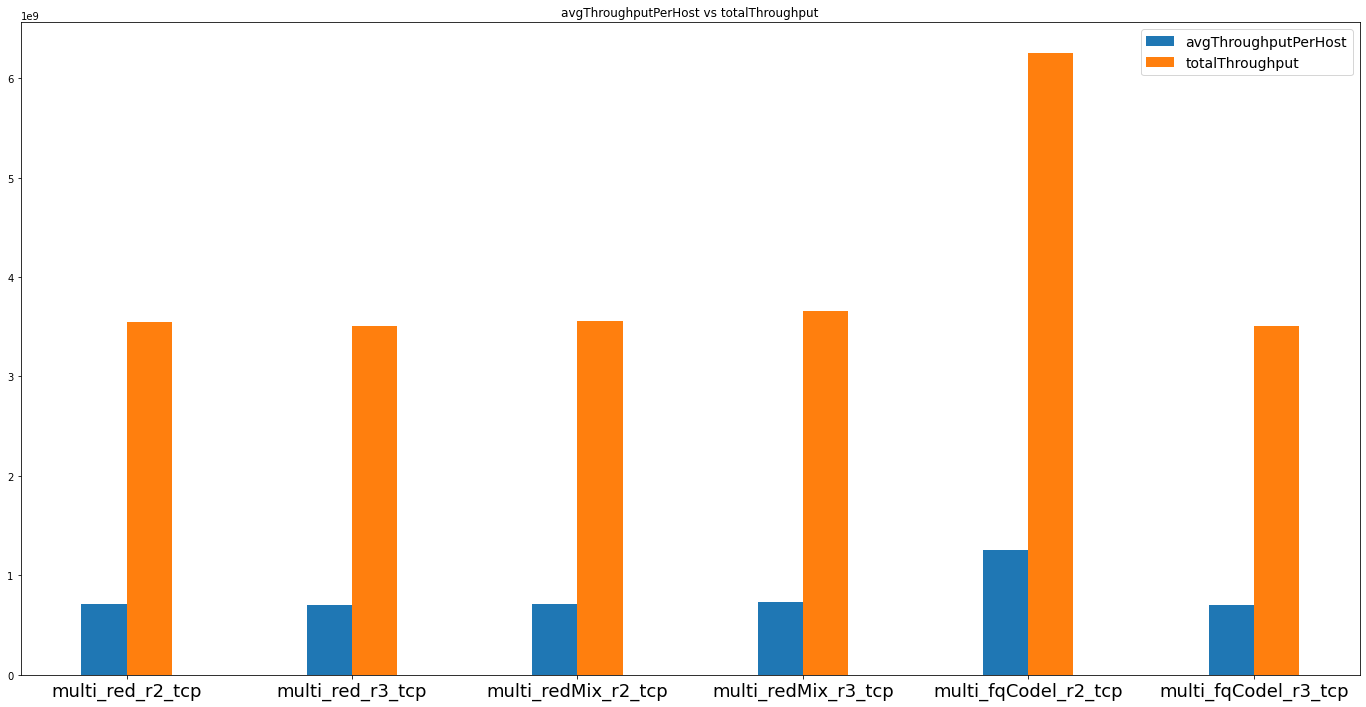

In [ ]:
plot2Bar(list_of_multi_algor, 'avgThroughputPerHost', 'totalThroughput')

In [ ]:
print(list_of_classful_algor)

{'algor_list': ['ets_strict_tcp', 'ets_tcp', 'htb_tcp', 'ets_strict_udp', 'ets_udp', 'htb_udp'], 'avgThroughputNonPirotized': [23184672.0, 26342346.0, 15212274.0, 145796224.0, 136475086.0, 447101494.0], 'throughtputPirotized': [40580136, 30880808, 48859392, 144960728, 128997976, 187056984]}


In [ ]:
def splitPirority(listOfVar, objects):
  value = 0
  for i in range(1, len(listOfVar)):
    value += listOfVar[i]
  avgValue = value / (len(objects)-1)
  return listOfVar[0], avgValue

In [ ]:
variables = ['totalBytes']
hosts_list = ['h1', 'h2', 'h3', 'h4', 'h5'] ##sorted
list_of_classful_algor_tcp = {'algor_list': [], 'avgThroughputPerHost': [], 'totalThroughput': [], 'avgThroughputNonPirotized': [], 'throughtputPirotized': [], 'avgRetransmitNonPirotized': [], 'retransmitPirotized': []}
list_of_classful_algor_udp = {'algor_list': [], 'avgThroughputPerHost': [], 'totalThroughput': [], 'avgThroughputNonPirotized': [], 'throughtputPirotized': [], 'avgLostPacketsNonPirotized': [], 'lostPacketsPirotized': [], 'avgLostPercentNonPirotized': [], 'lostPercentPirotized': []}
for i in hosts_list:
  list_of_classful_algor_tcp[f'{i}'] = {}
  list_of_classful_algor_udp[f'{i}'] = {}
  list_of_classful_algor_tcp[f'{i}']['totalBytes'] = []
  list_of_classful_algor_tcp[f'{i}']['retransmit'] = []
  list_of_classful_algor_udp[f'{i}']['totalBytes'] = []
  list_of_classful_algor_udp[f'{i}']['lostPackets'] = []
  list_of_classful_algor_udp[f'{i}']['lostPercent'] = []
for j in classful_algor_list:
  if j["name"].endswith("tcp"):
    list_of_classful_algor_tcp['algor_list'].append(j["name"])
    hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
    avgThroughputPerHost, totalThroughput = getThroughput(j)
    retransmit = getRetransmit(j)
    list_of_classful_algor_tcp['avgThroughputPerHost'].append(avgThroughputPerHost)
    list_of_classful_algor_tcp['totalThroughput'].append(totalThroughput)
    throughtputPirotized, avgThroughputNonPirotized = splitPirority(totalBytes, hosts)
    list_of_classful_algor_tcp['avgThroughputNonPirotized'].append(avgThroughputNonPirotized)
    list_of_classful_algor_tcp['throughtputPirotized'].append(throughtputPirotized)
    retransmitPirotized, avgRetransmitNonPirotized = splitPirority(retransmit, hosts)
    list_of_classful_algor_tcp['avgRetransmitNonPirotized'].append(avgRetransmitNonPirotized)
    list_of_classful_algor_tcp['retransmitPirotized'].append(retransmitPirotized)
    for i in range(len(hosts_list)):
      list_of_classful_algor_tcp[hosts[i]]['totalBytes'].append(totalBytes[i])
      list_of_classful_algor_tcp[hosts[i]]['retransmit'].append(retransmit[i])
  if j["name"].endswith("udp"):
    list_of_classful_algor_udp['algor_list'].append(j["name"])
    hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
    avgThroughputPerHost, overallThroughput = getThroughput(j)
    lostPackets,lostPercent= getLost(j)
    list_of_classful_algor_udp['avgThroughputPerHost'].append(avgThroughputPerHost)
    list_of_classful_algor_udp['totalThroughput'].append(totalThroughput)
    lostPacketsPirotized, avgLostPacketsNonPirotized = splitPirority(lostPackets, hosts)
    list_of_classful_algor_udp['avgLostPacketsNonPirotized'].append(avgLostPacketsNonPirotized)
    list_of_classful_algor_udp['lostPacketsPirotized'].append(lostPacketsPirotized)
    lostPercentPirotized, avgLostPercentNonPirotized = splitPirority(lostPercent, hosts)
    list_of_classful_algor_udp['avgLostPercentNonPirotized'].append(avgLostPercentNonPirotized)
    list_of_classful_algor_udp['lostPercentPirotized'].append(lostPercentPirotized)
    for i in range(len(hosts_list)):
      list_of_classful_algor_udp[hosts[i]]['totalBytes'].append(totalBytes[i])
      list_of_classful_algor_udp[hosts[i]]['lostPackets'].append(lostPackets[i])
      list_of_classful_algor_udp[hosts[i]]['lostPercent'].append(lostPercent[i])

In [ ]:
variables = ['totalBytes']
hosts_list = ['h1', 'h2', 'h3', 'h4', 'h5'] ##sorted
list_of_classless_algor_tcp = {'algor_list': [], 'avgThroughputPerHost': [], 'totalThroughput': []}
list_of_classless_algor_udp = {'algor_list': [], 'avgThroughputPerHost': [], 'totalThroughput': []}
for i in hosts_list:
  list_of_classless_algor_tcp[f'{i}'] = {}
  list_of_classless_algor_udp[f'{i}'] = {}
  list_of_classless_algor_tcp[f'{i}']['totalBytes'] = []
  list_of_classless_algor_tcp[f'{i}']['retransmit'] = []
  list_of_classless_algor_udp[f'{i}']['totalBytes'] = []
  list_of_classless_algor_udp[f'{i}']['lostPackets'] = []
  list_of_classless_algor_udp[f'{i}']['lostPercent'] = []
for j in classless_algor_list:
  if j["name"].endswith("tcp"):
    list_of_classless_algor_tcp['algor_list'].append(j["name"])
    hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
    avgThroughputPerHost, totalThroughput = getThroughput(j)
    list_of_classless_algor_tcp['avgThroughputPerHost'].append(avgThroughputPerHost)
    list_of_classless_algor_tcp['totalThroughput'].append(totalThroughput)
    for i in range(len(hosts_list)):
      list_of_classless_algor_tcp[hosts[i]]['totalBytes'].append(totalBytes[i])
      list_of_classless_algor_tcp[hosts[i]]['retransmit'].append(getRetransmit(j)[i])
  if j["name"].endswith("udp"):
    list_of_classless_algor_udp['algor_list'].append(j["name"])
    hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
    avgThroughputPerHost, overallThroughput = getThroughput(j)
    lostPackets,lostPercent= getLost(j)
    list_of_classless_algor_udp['avgThroughputPerHost'].append(avgThroughputPerHost)
    list_of_classless_algor_udp['totalThroughput'].append(totalThroughput)
    for i in range(len(hosts_list)):
      list_of_classless_algor_udp[hosts[i]]['totalBytes'].append(totalBytes[i])
      list_of_classless_algor_udp[hosts[i]]['lostPackets'].append(lostPackets[i])
      list_of_classless_algor_udp[hosts[i]]['lostPercent'].append(lostPercent[i])

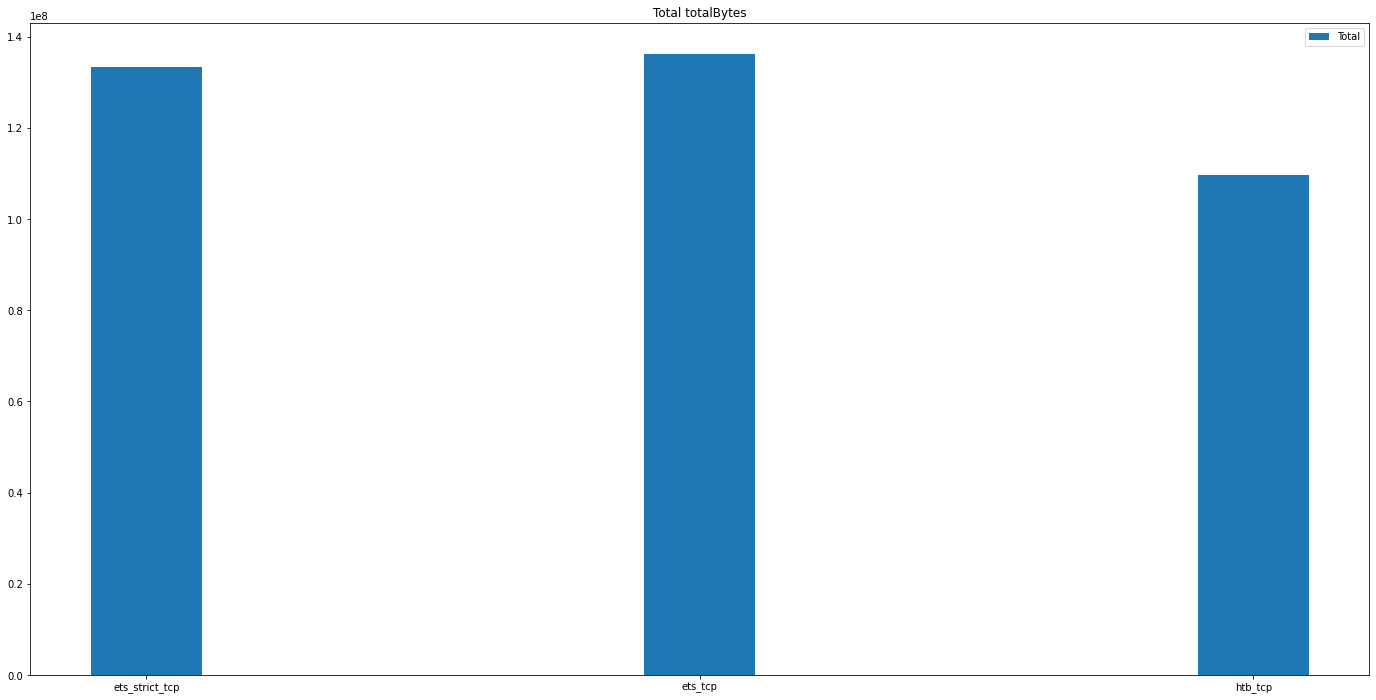

In [ ]:
plotSingleBarPerHost(list_of_classful_algor_tcp, 'totalBytes', True)

In [ ]:
variables = ['totalBytes']
hosts_list = ['h1', 'h2', 'h3', 'h4', 'h5'] ##sorted
list_of_ets_tcp = {'algor_list': [], 'avgThroughputPerHost': [], 'totalThroughput': [], 'avgThroughputNonPirotized': [], 'throughtputPirotized': [], 'avgRetransmitNonPirotized': [], 'retransmitPirotized': []}
list_of_ets_udp = {'algor_list': [], 'avgThroughputPerHost': [], 'totalThroughput': [], 'avgThroughputNonPirotized': [], 'throughtputPirotized': [], 'avgLostPacketsNonPirotized': [], 'lostPacketsPirotized': [], 'avgLostPercentNonPirotized': [], 'lostPercentPirotized': []}
for i in hosts_list:
  list_of_ets_tcp[f'{i}'] = {}
  list_of_ets_udp[f'{i}'] = {}
  list_of_ets_tcp[f'{i}']['totalBytes'] = []
  list_of_ets_tcp[f'{i}']['retransmit'] = []
  list_of_ets_udp[f'{i}']['totalBytes'] = []
  list_of_ets_udp[f'{i}']['lostPackets'] = []
  list_of_ets_udp[f'{i}']['lostPercent'] = []
for j in ets_list:
  if j["name"].endswith("tcp"):
    list_of_ets_tcp['algor_list'].append(j["name"])
    hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
    avgThroughputPerHost, totalThroughput = getThroughput(j)
    retransmit = getRetransmit(j)
    list_of_ets_tcp['avgThroughputPerHost'].append(avgThroughputPerHost)
    list_of_ets_tcp['totalThroughput'].append(totalThroughput)
    throughtputPirotized, avgThroughputNonPirotized = splitPirority(totalBytes, hosts)
    list_of_ets_tcp['avgThroughputNonPirotized'].append(avgThroughputNonPirotized)
    list_of_ets_tcp['throughtputPirotized'].append(throughtputPirotized)
    retransmitPirotized, avgRetransmitNonPirotized = splitPirority(retransmit, hosts)
    list_of_ets_tcp['avgRetransmitNonPirotized'].append(avgRetransmitNonPirotized)
    list_of_ets_tcp['retransmitPirotized'].append(retransmitPirotized)
    for i in range(len(hosts_list)):
      list_of_ets_tcp[hosts[i]]['totalBytes'].append(totalBytes[i])
      list_of_ets_tcp[hosts[i]]['retransmit'].append(retransmit[i])
  if j["name"].endswith("udp"):
    list_of_ets_udp['algor_list'].append(j["name"])
    hosts, intervals, bytesInterval, bitsPerSecond, totalBytes, sumBps = generateIntervals(j)
    avgThroughputPerHost, overallThroughput = getThroughput(j)
    lostPackets,lostPercent= getLost(j)
    list_of_ets_udp['avgThroughputPerHost'].append(avgThroughputPerHost)
    list_of_ets_udp['totalThroughput'].append(totalThroughput)
    lostPacketsPirotized, avgLostPacketsNonPirotized = splitPirority(lostPackets, hosts)
    list_of_ets_udp['avgLostPacketsNonPirotized'].append(avgLostPacketsNonPirotized)
    list_of_ets_udp['lostPacketsPirotized'].append(lostPacketsPirotized)
    lostPercentPirotized, avgLostPercentNonPirotized = splitPirority(lostPercent, hosts)
    list_of_ets_udp['avgLostPercentNonPirotized'].append(avgLostPercentNonPirotized)
    list_of_ets_udp['lostPercentPirotized'].append(lostPercentPirotized)
    for i in range(len(hosts_list)):
      list_of_ets_udp[hosts[i]]['totalBytes'].append(totalBytes[i])
      list_of_ets_udp[hosts[i]]['lostPackets'].append(lostPackets[i])
      list_of_ets_udp[hosts[i]]['lostPercent'].append(lostPercent[i])

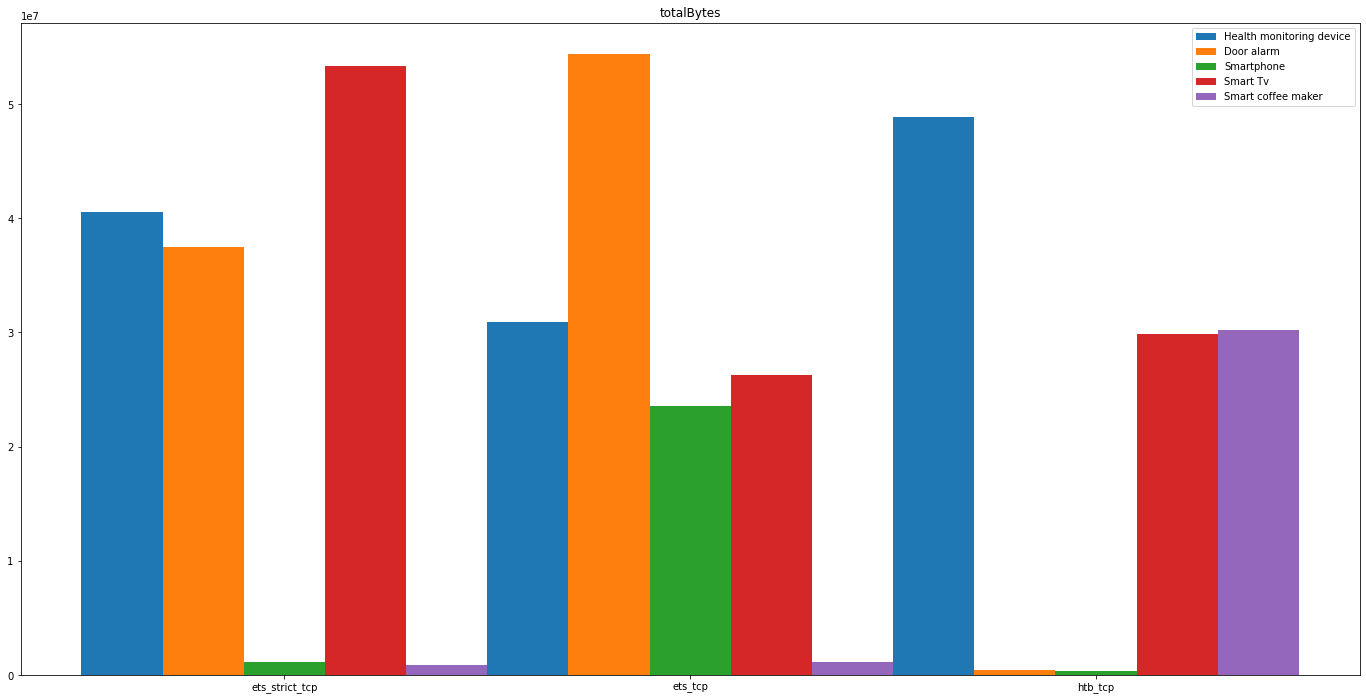

In [ ]:
plotBarPerHost(list_of_classful_algor_tcp, 'totalBytes')

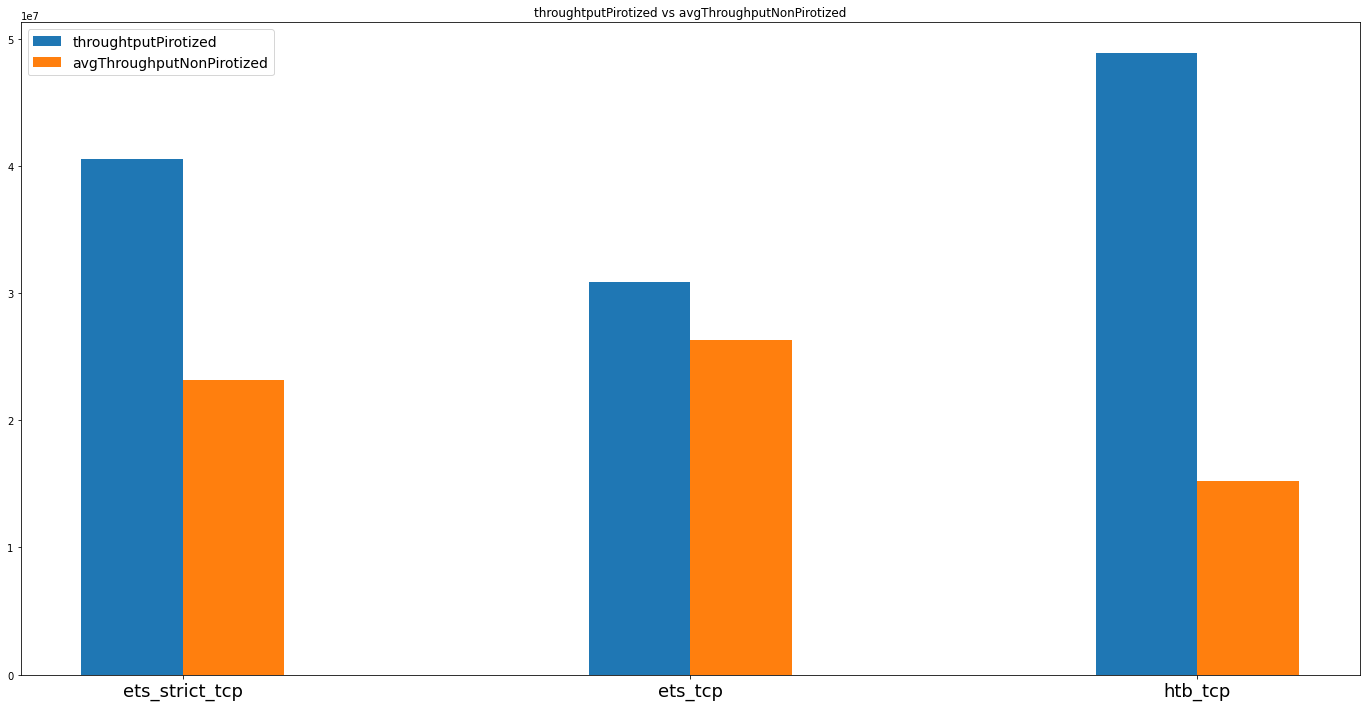

In [ ]:
plot2Bar(list_of_classful_algor_tcp, 'throughtputPirotized', 'avgThroughputNonPirotized')

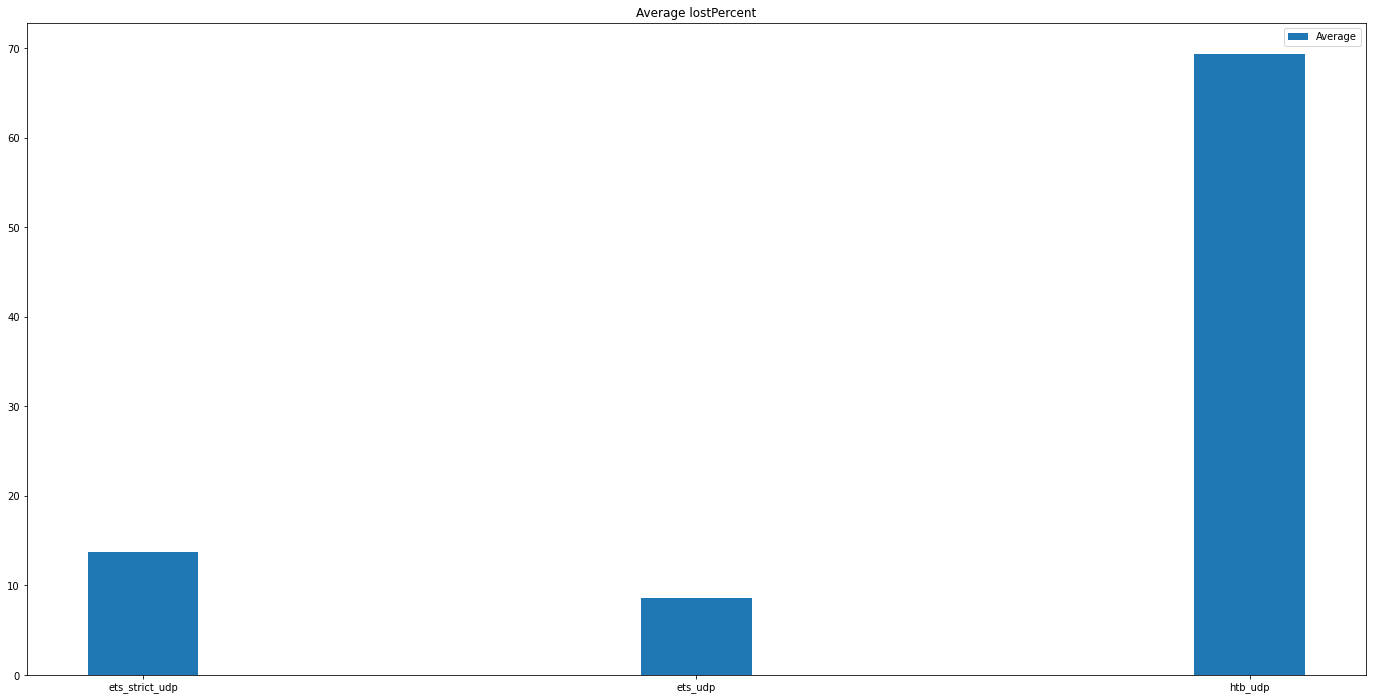

In [ ]:
plotSingleBarPerHost(list_of_classful_algor_udp, 'lostPercent', False)

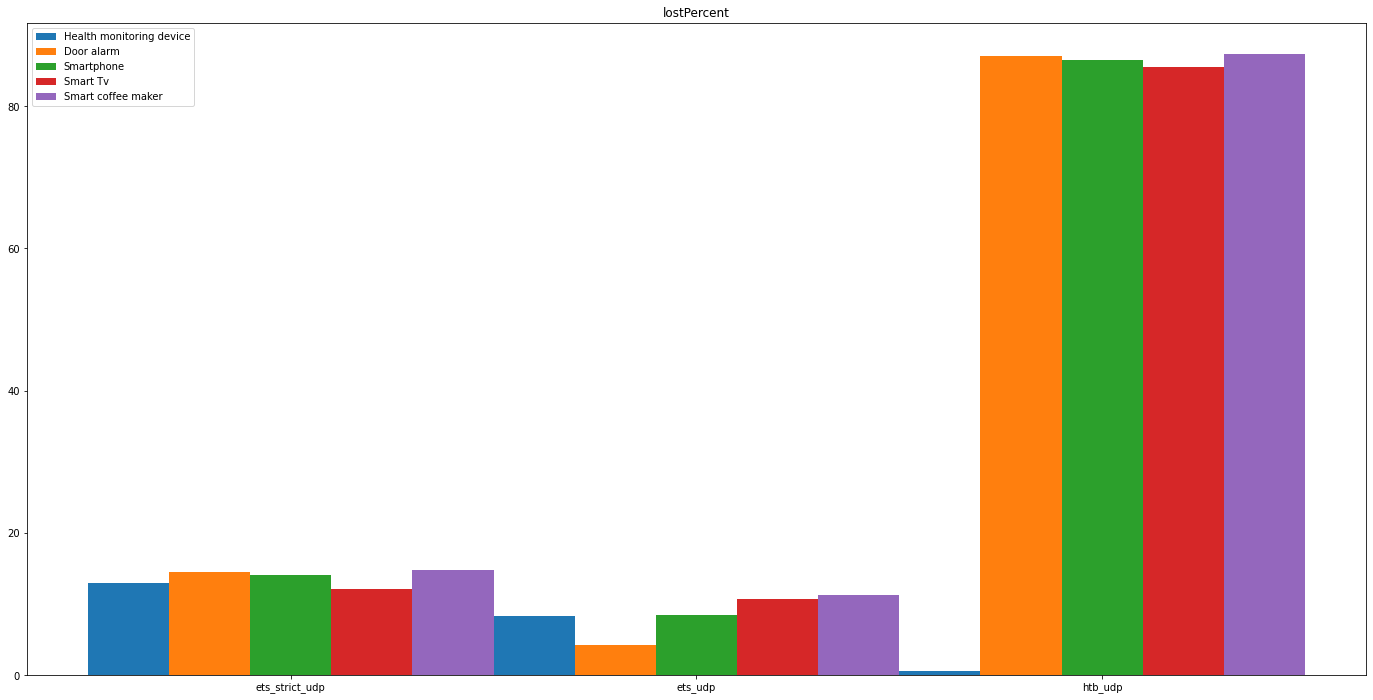

In [ ]:
plotBarPerHost(list_of_classful_algor_udp, 'lostPercent')

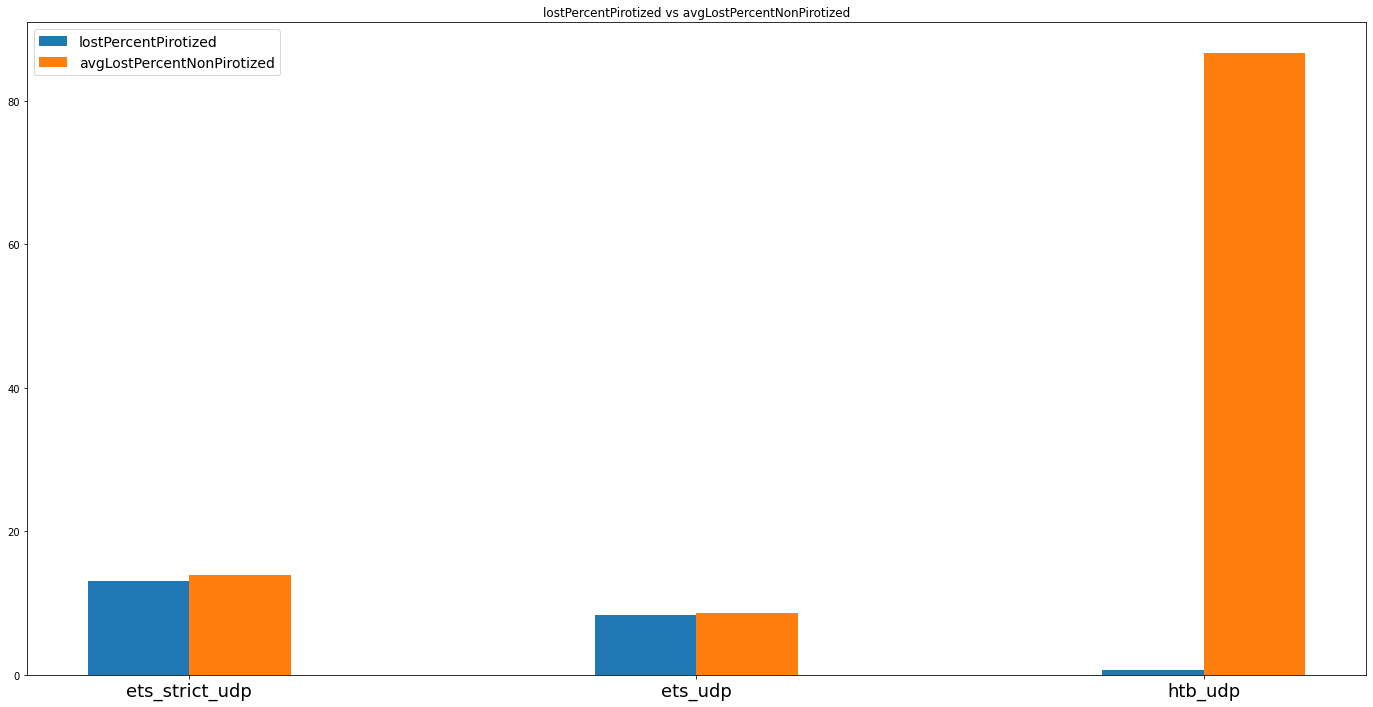

In [ ]:
plot2Bar(list_of_classful_algor_udp, 'lostPercentPirotized', 'avgLostPercentNonPirotized')

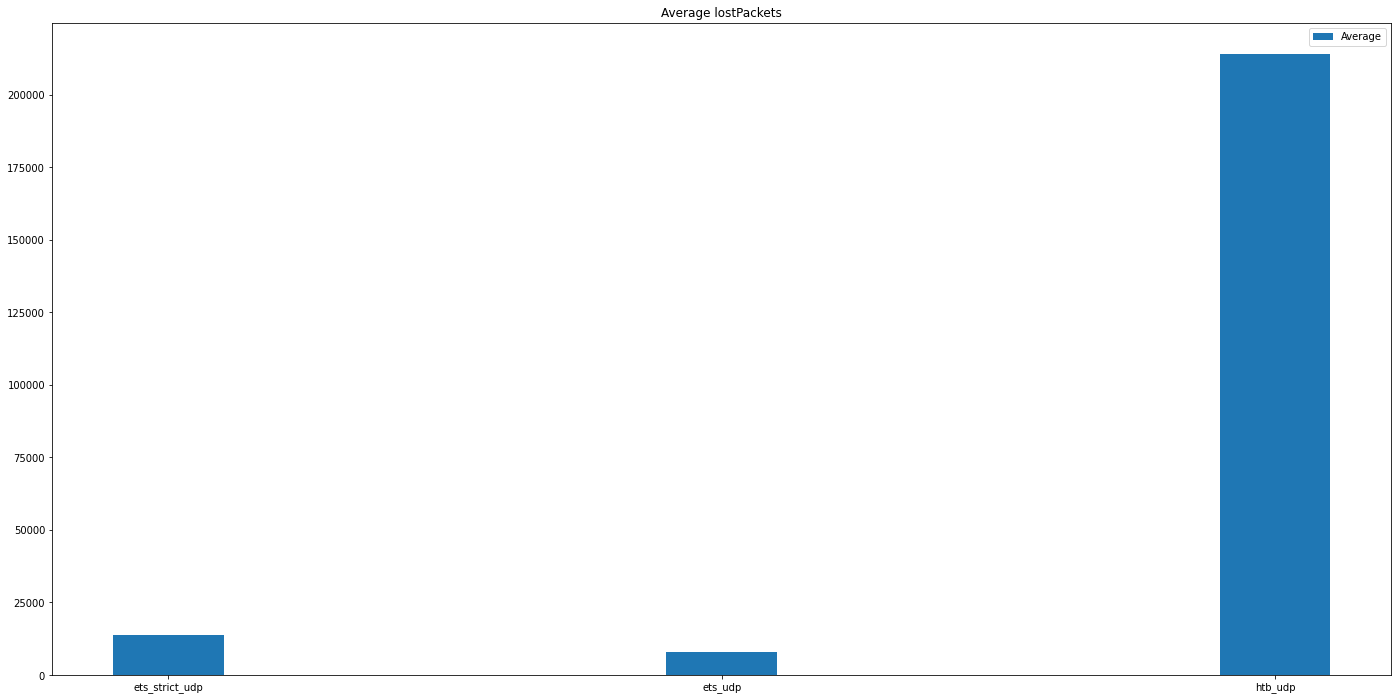

In [ ]:
plotSingleBarPerHost(list_of_classful_algor_udp, 'lostPackets', False)

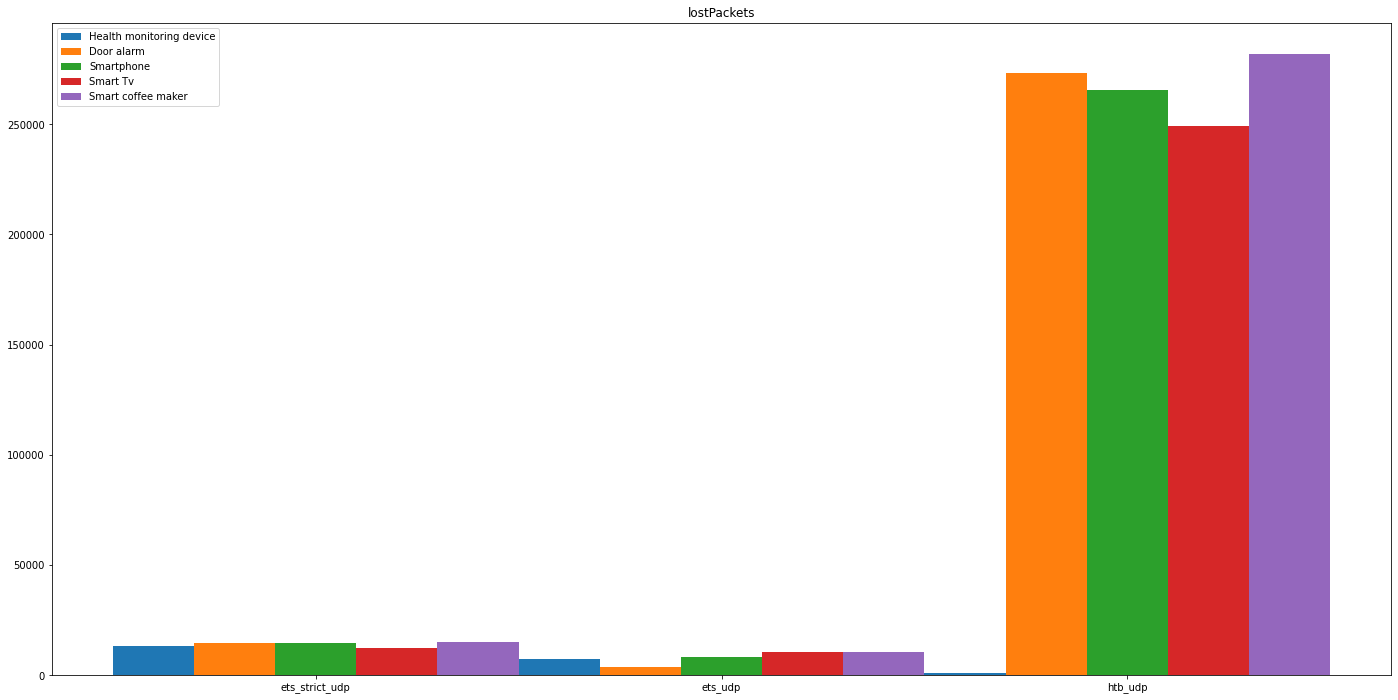

In [ ]:
plotBarPerHost(list_of_classful_algor_udp, 'lostPackets')

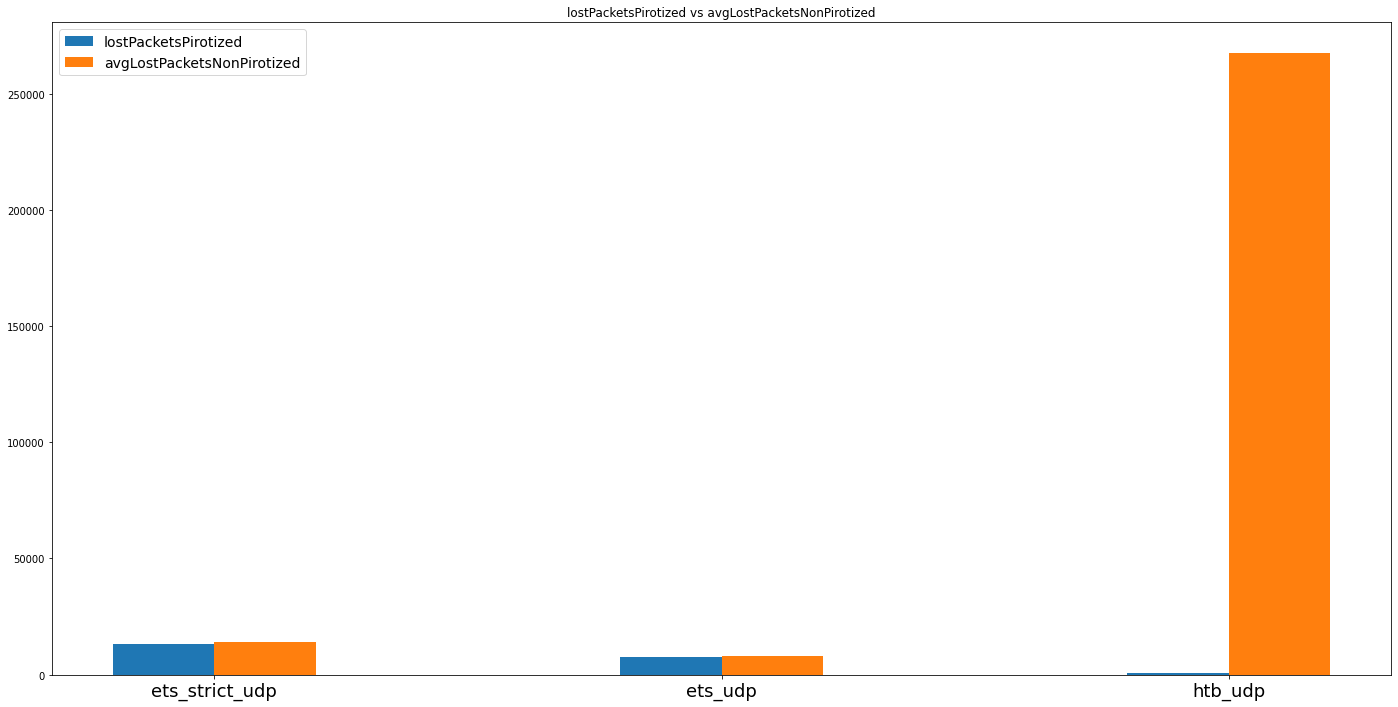

In [ ]:
plot2Bar(list_of_classful_algor_udp, 'lostPacketsPirotized', 'avgLostPacketsNonPirotized')

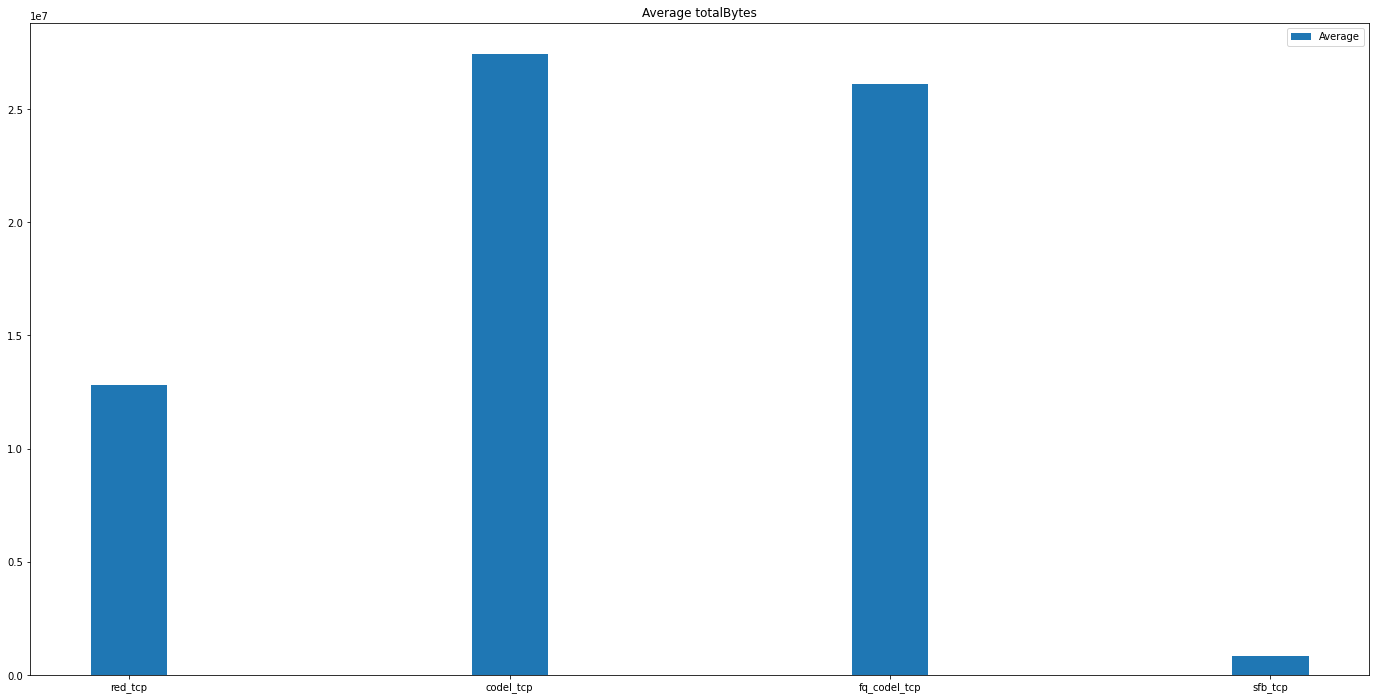

In [ ]:
plotSingleBarPerHost(list_of_classless_algor_tcp, 'totalBytes', False)

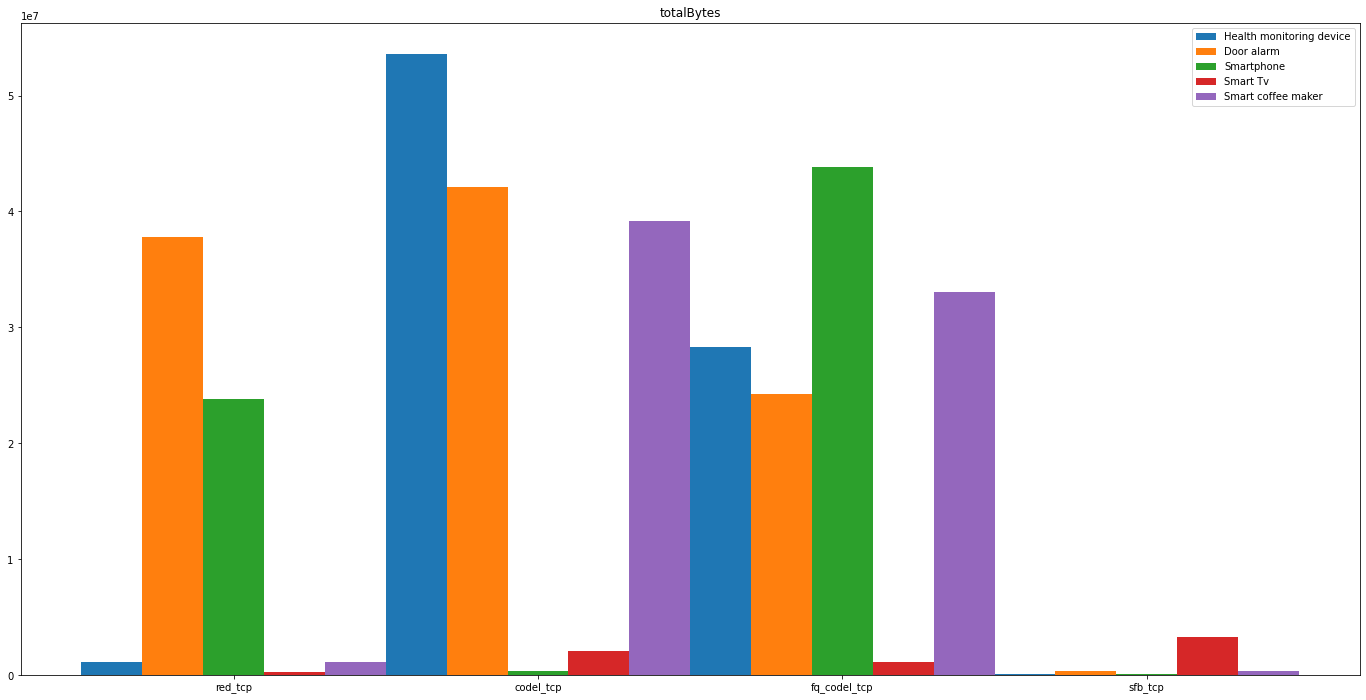

In [ ]:
plotBarPerHost(list_of_classless_algor_tcp, 'totalBytes')

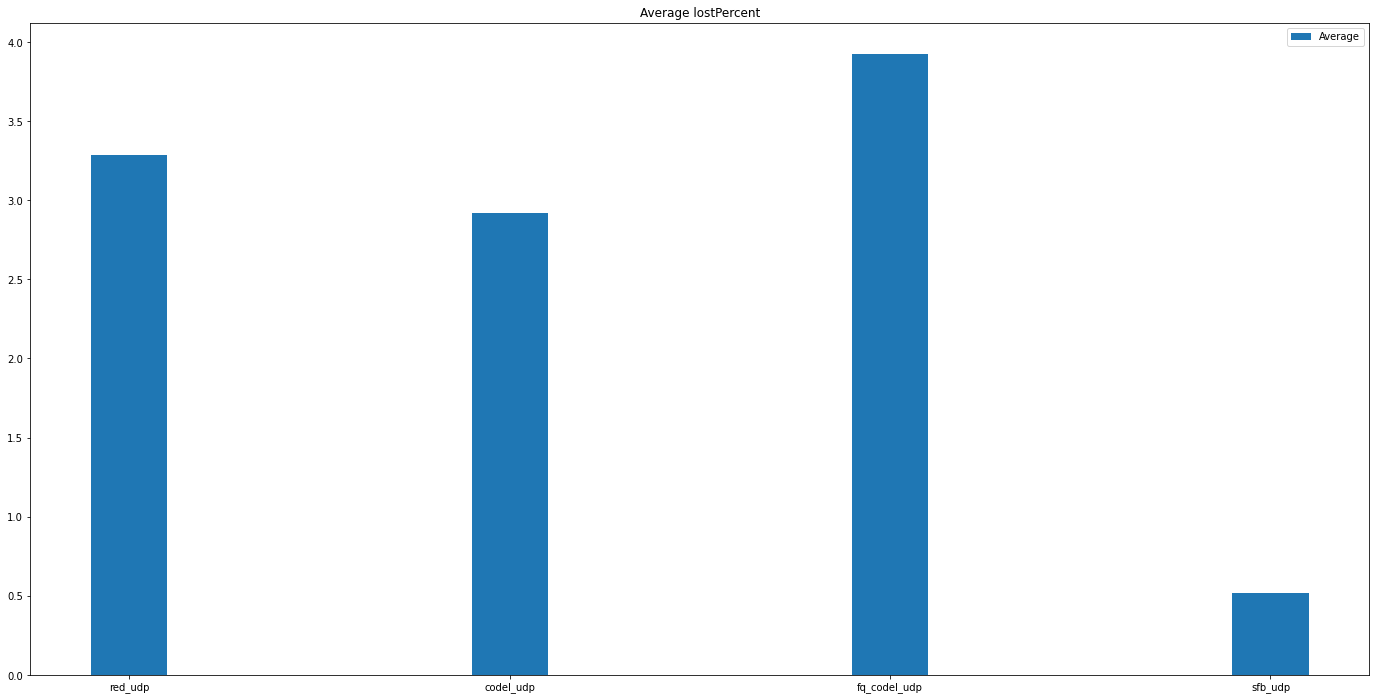

In [ ]:
plotSingleBarPerHost(list_of_classless_algor_udp, 'lostPercent', False)

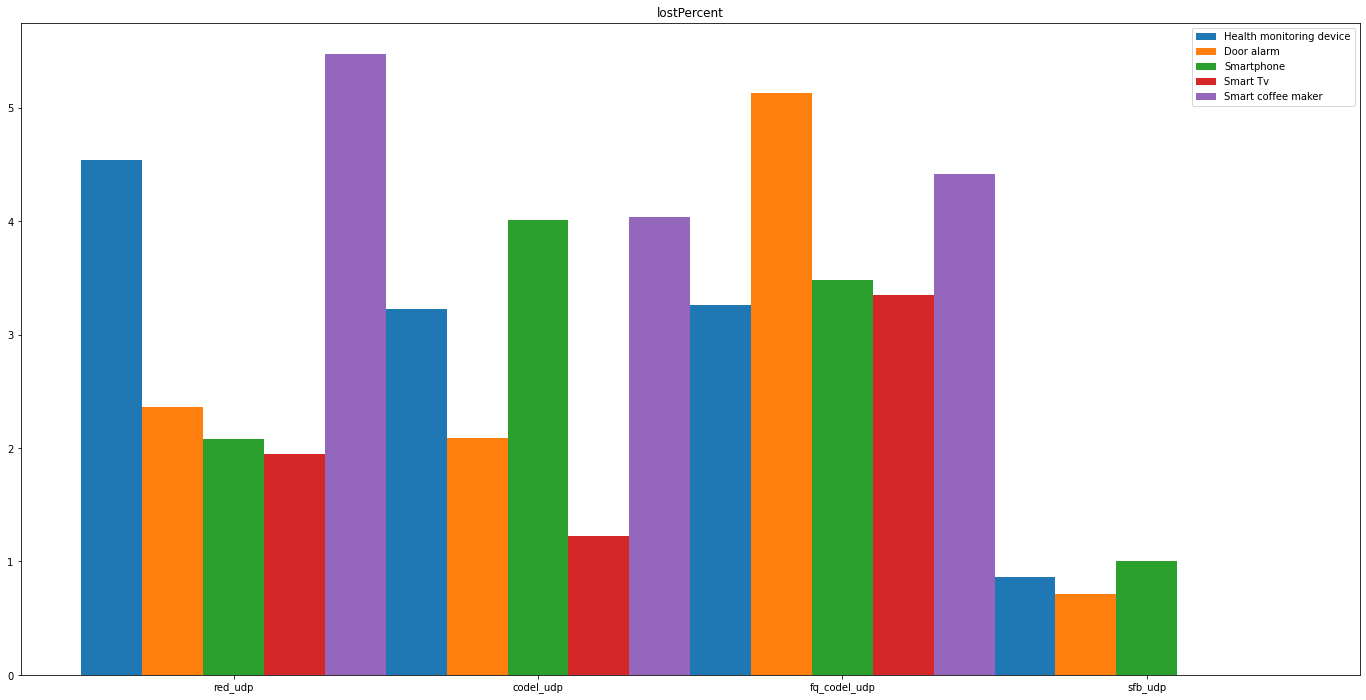

In [ ]:
plotBarPerHost(list_of_classless_algor_udp, 'lostPercent')

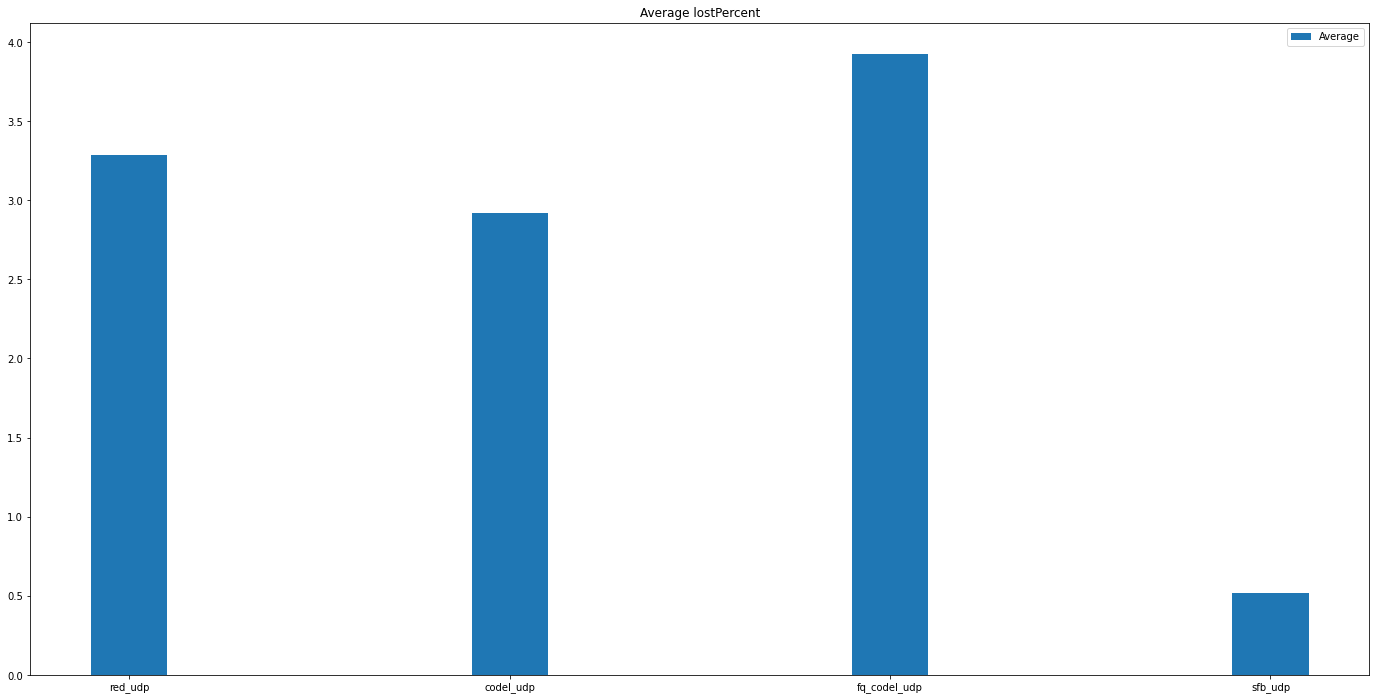

In [ ]:
plotSingleBarPerHost(list_of_classless_algor_udp, 'lostPercent', False)

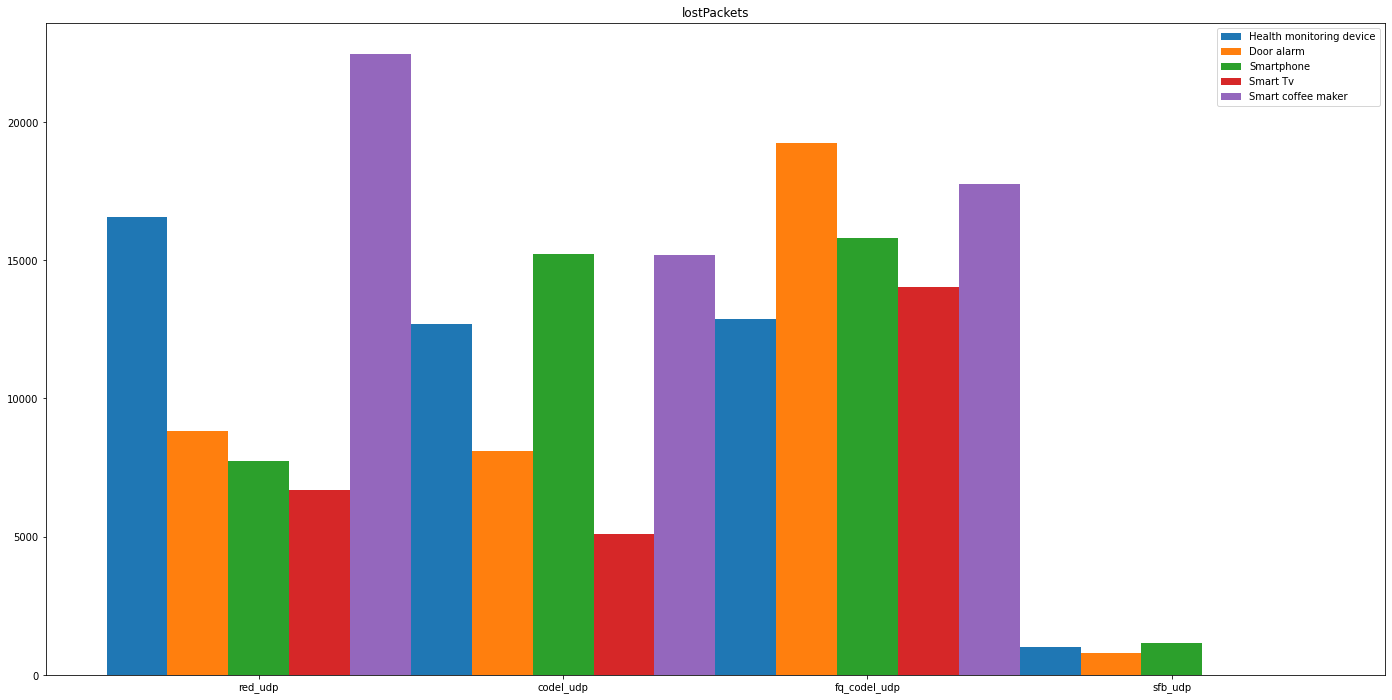

In [ ]:
plotBarPerHost(list_of_classless_algor_udp, 'lostPackets')

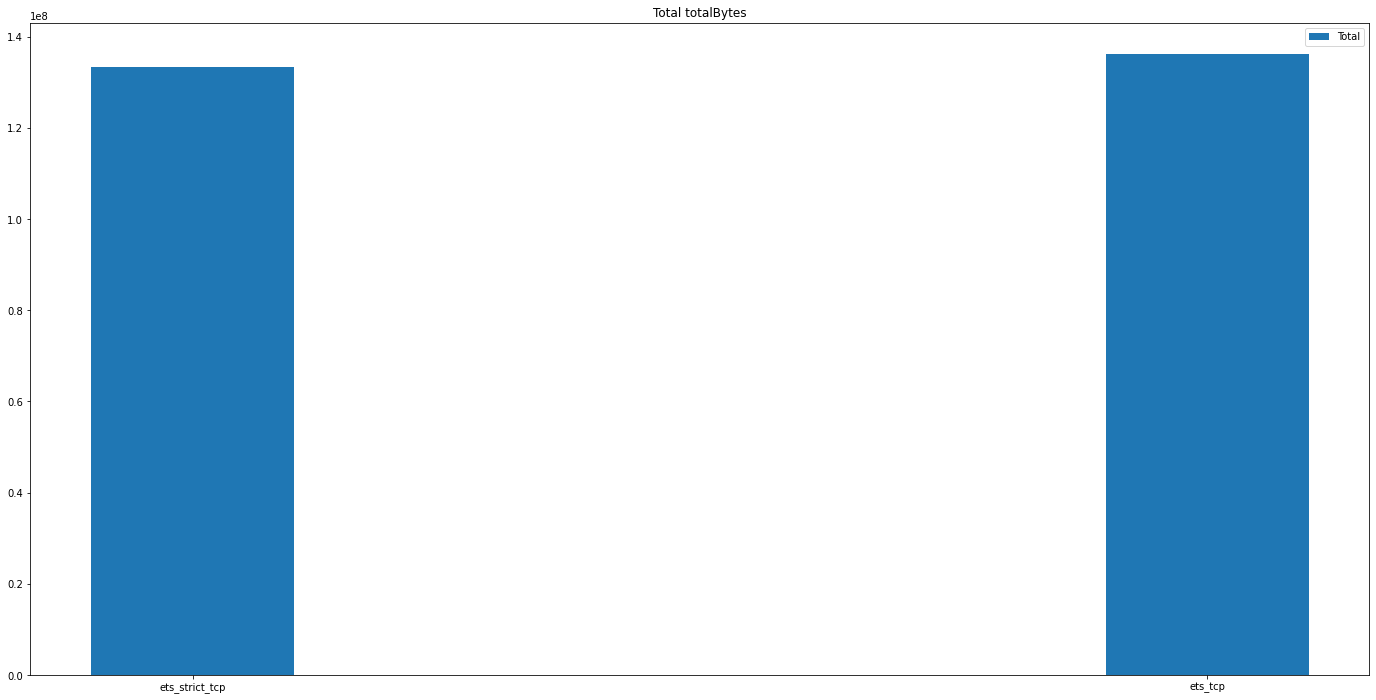

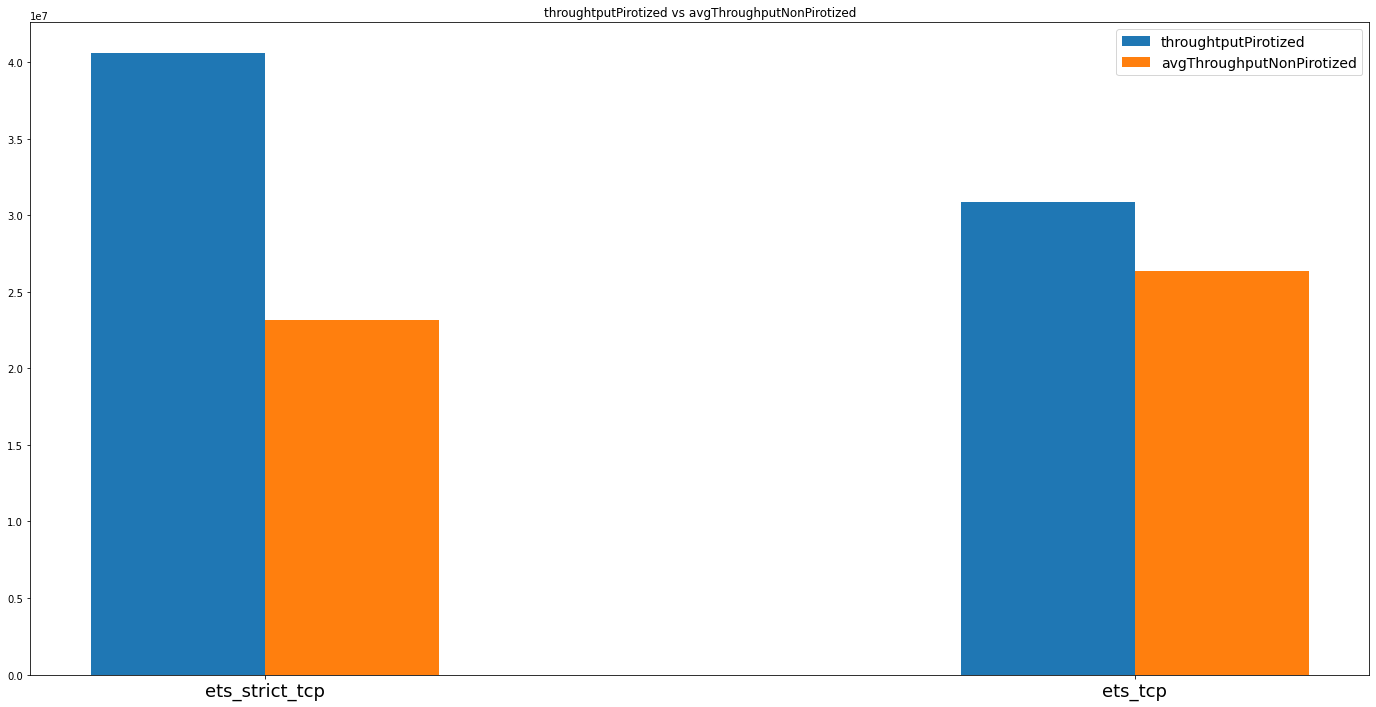

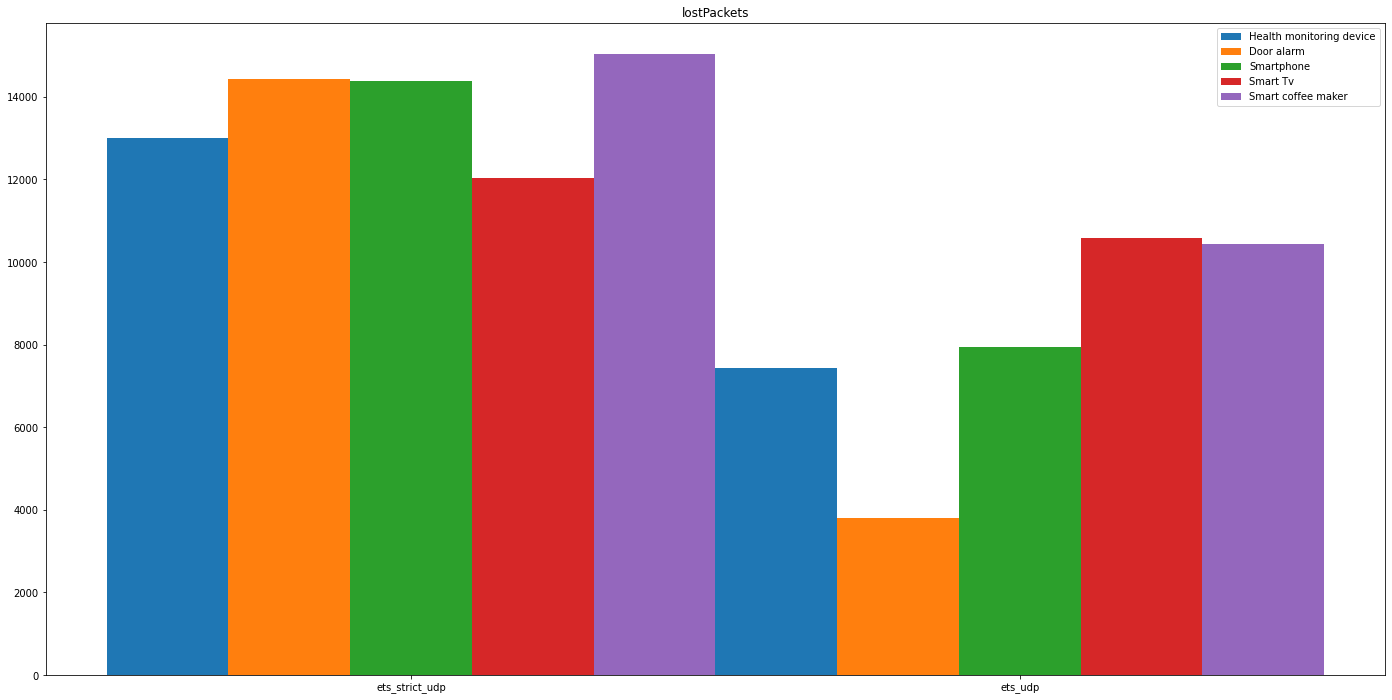

In [ ]:
plotSingleBarPerHost(list_of_ets_tcp, 'totalBytes', True)
plot2Bar(list_of_ets_tcp, 'throughtputPirotized', 'avgThroughputNonPirotized')
plotBarPerHost(list_of_ets_udp, 'lostPackets')